In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1359, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

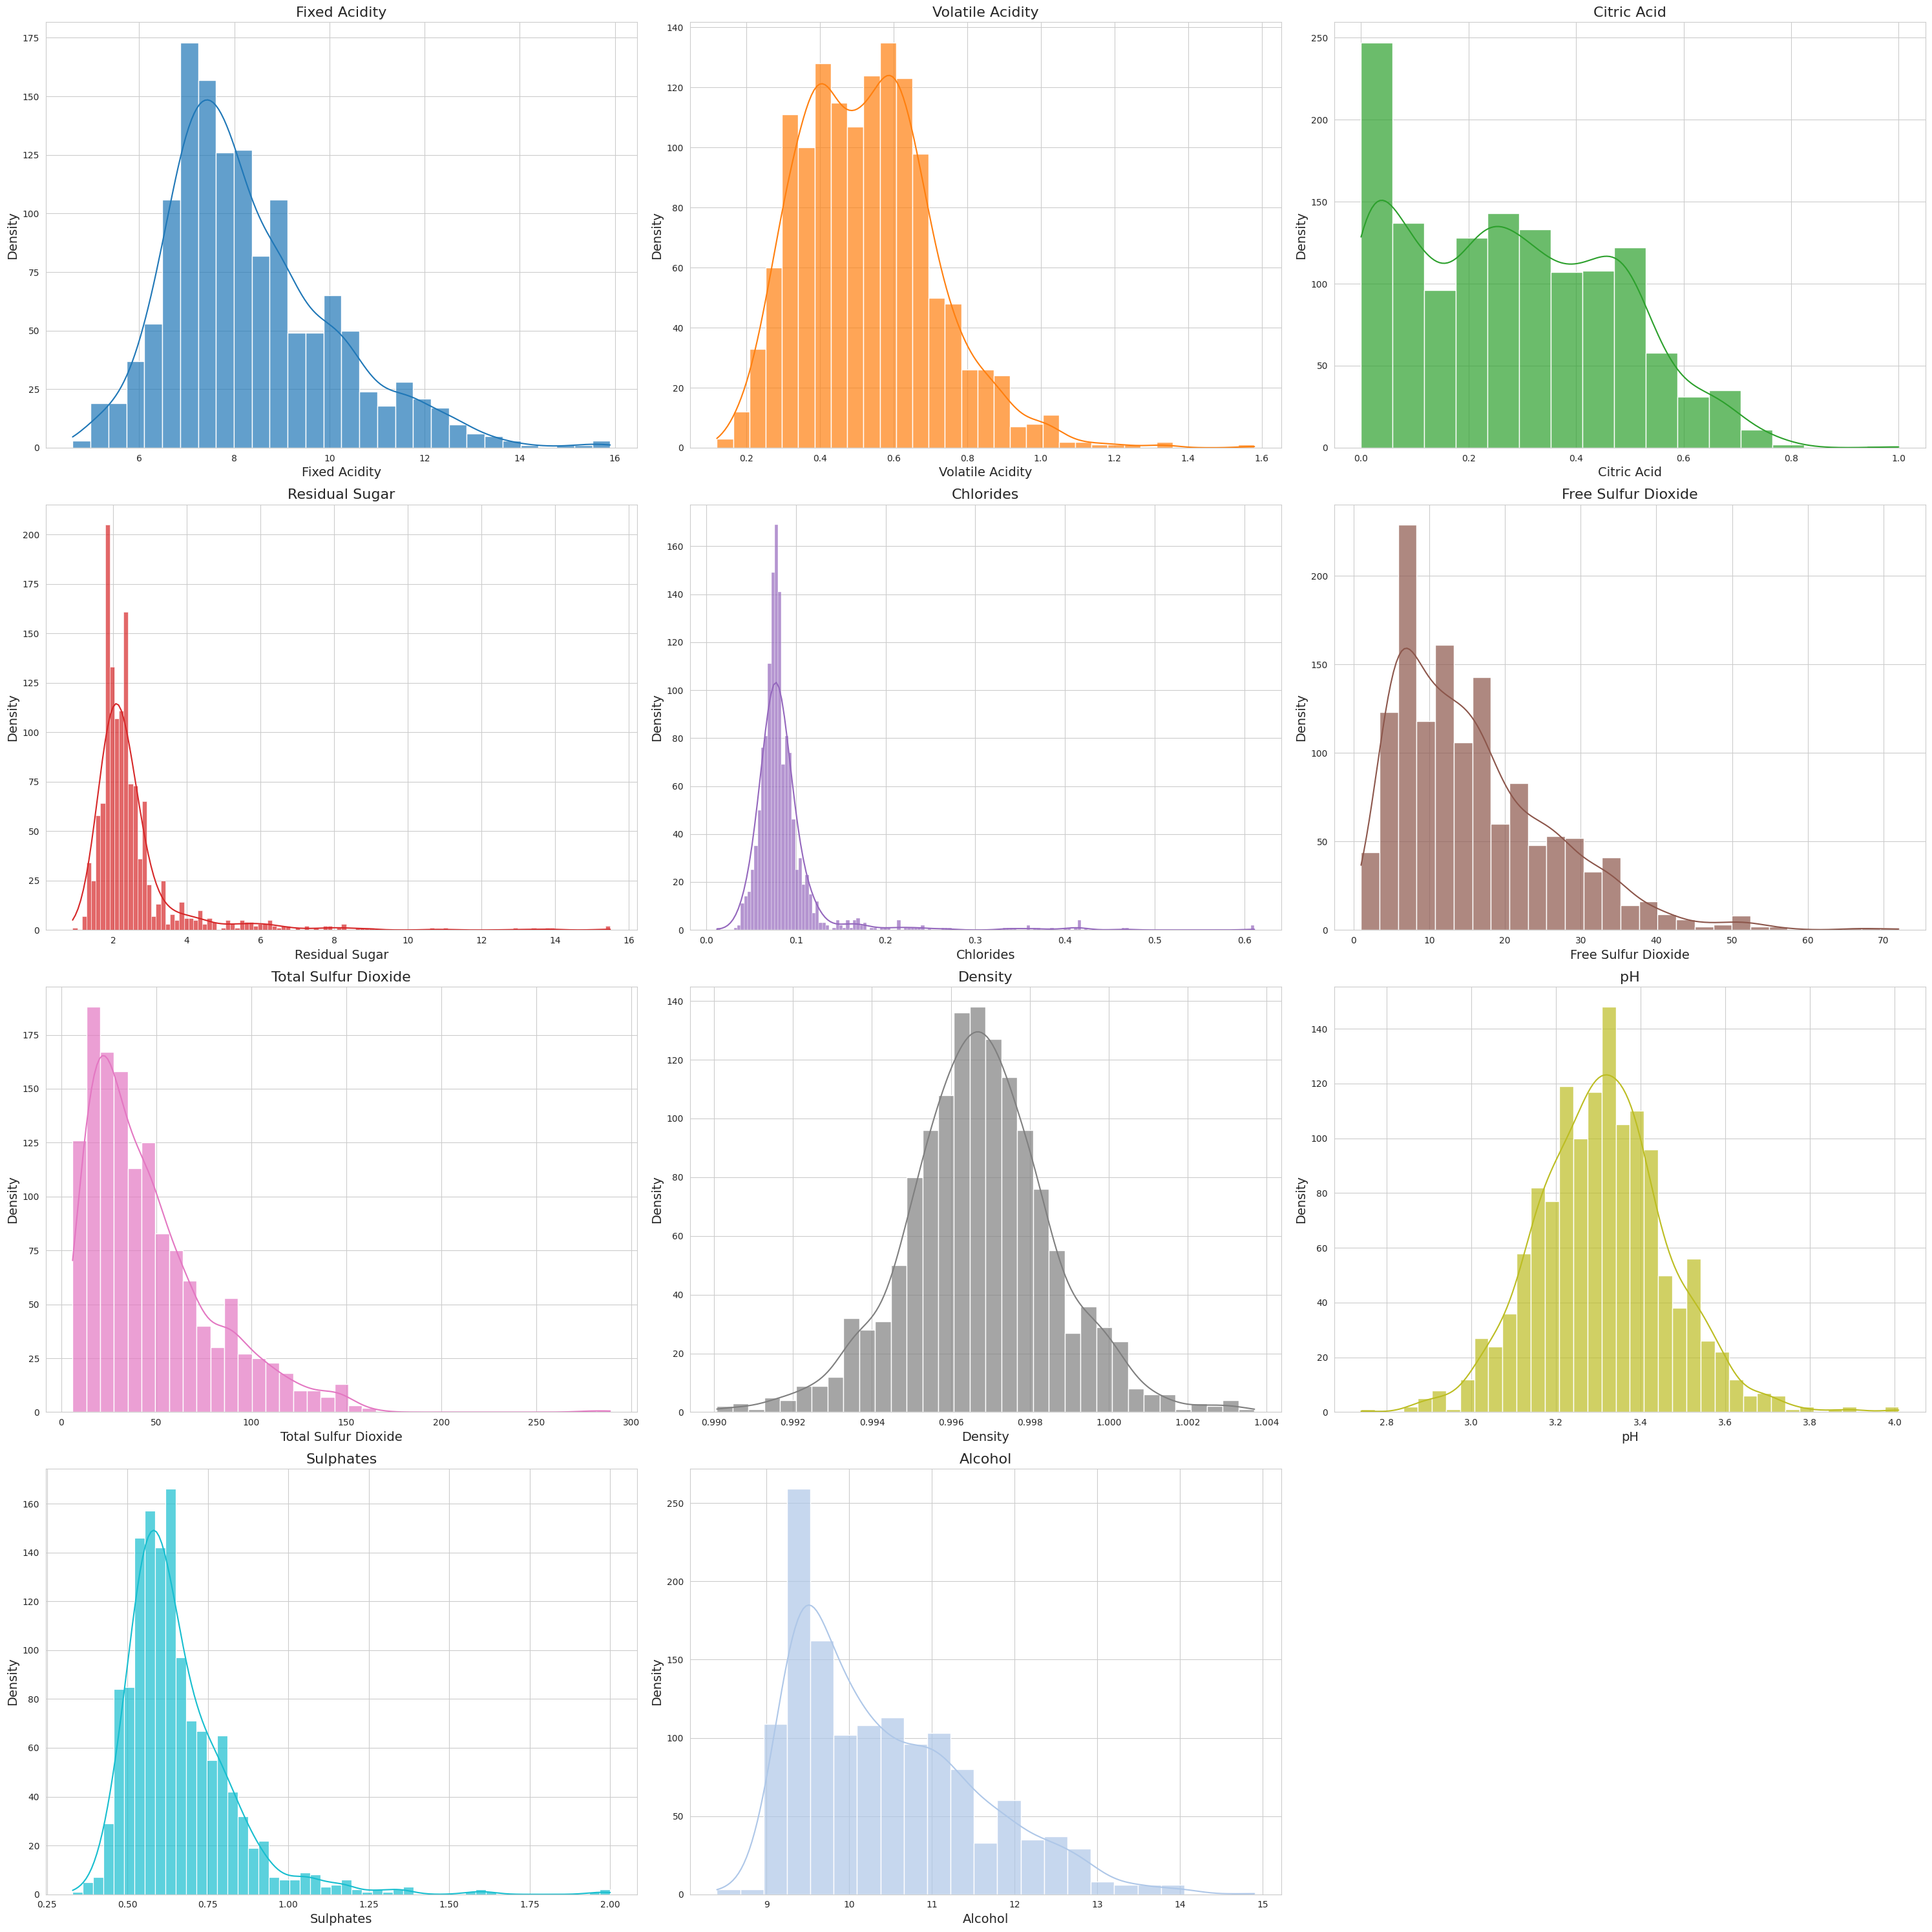

In [ ]:
sns.set_style("whitegrid")


colors = ['#1f77b7', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']


plt.figure(figsize=(30, 30))


plt.subplot(4, 3, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Fixed Acidity', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 2)
sns.histplot(df['volatile acidity'], kde=True, color=colors[1], alpha=0.7)
plt.title('Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 3)
sns.histplot(df['citric acid'], kde=True, color=colors[2], alpha=0.7)
plt.title('Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 4)
sns.histplot(df['residual sugar'], kde=True, color=colors[3], alpha=0.7)
plt.title('Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 5)
sns.histplot(df['chlorides'], kde=True, color=colors[4], alpha=0.7)
plt.title('Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 6)
sns.histplot(df['free sulfur dioxide'], kde=True, color=colors[5], alpha=0.7)
plt.title('Free Sulfur Dioxide', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 7)
sns.histplot(df['total sulfur dioxide'], kde=True, color=colors[6], alpha=0.7)
plt.title('Total Sulfur Dioxide', fontsize=16)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 8)
sns.histplot(df['density'], kde=True, color=colors[7], alpha=0.7)
plt.title('Density', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 9)
sns.histplot(df['pH'], kde=True, color=colors[8], alpha=0.7)
plt.title('pH', fontsize=16)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 10)
sns.histplot(df['sulphates'], kde=True, color=colors[9], alpha=0.7)
plt.title('Sulphates', fontsize=16)
plt.xlabel('Sulphates', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.subplot(4, 3, 11)
sns.histplot(df['alcohol'], kde=True, color=colors[10], alpha=0.7)
plt.title('Alcohol', fontsize=16)
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.tight_layout()


plt.show()

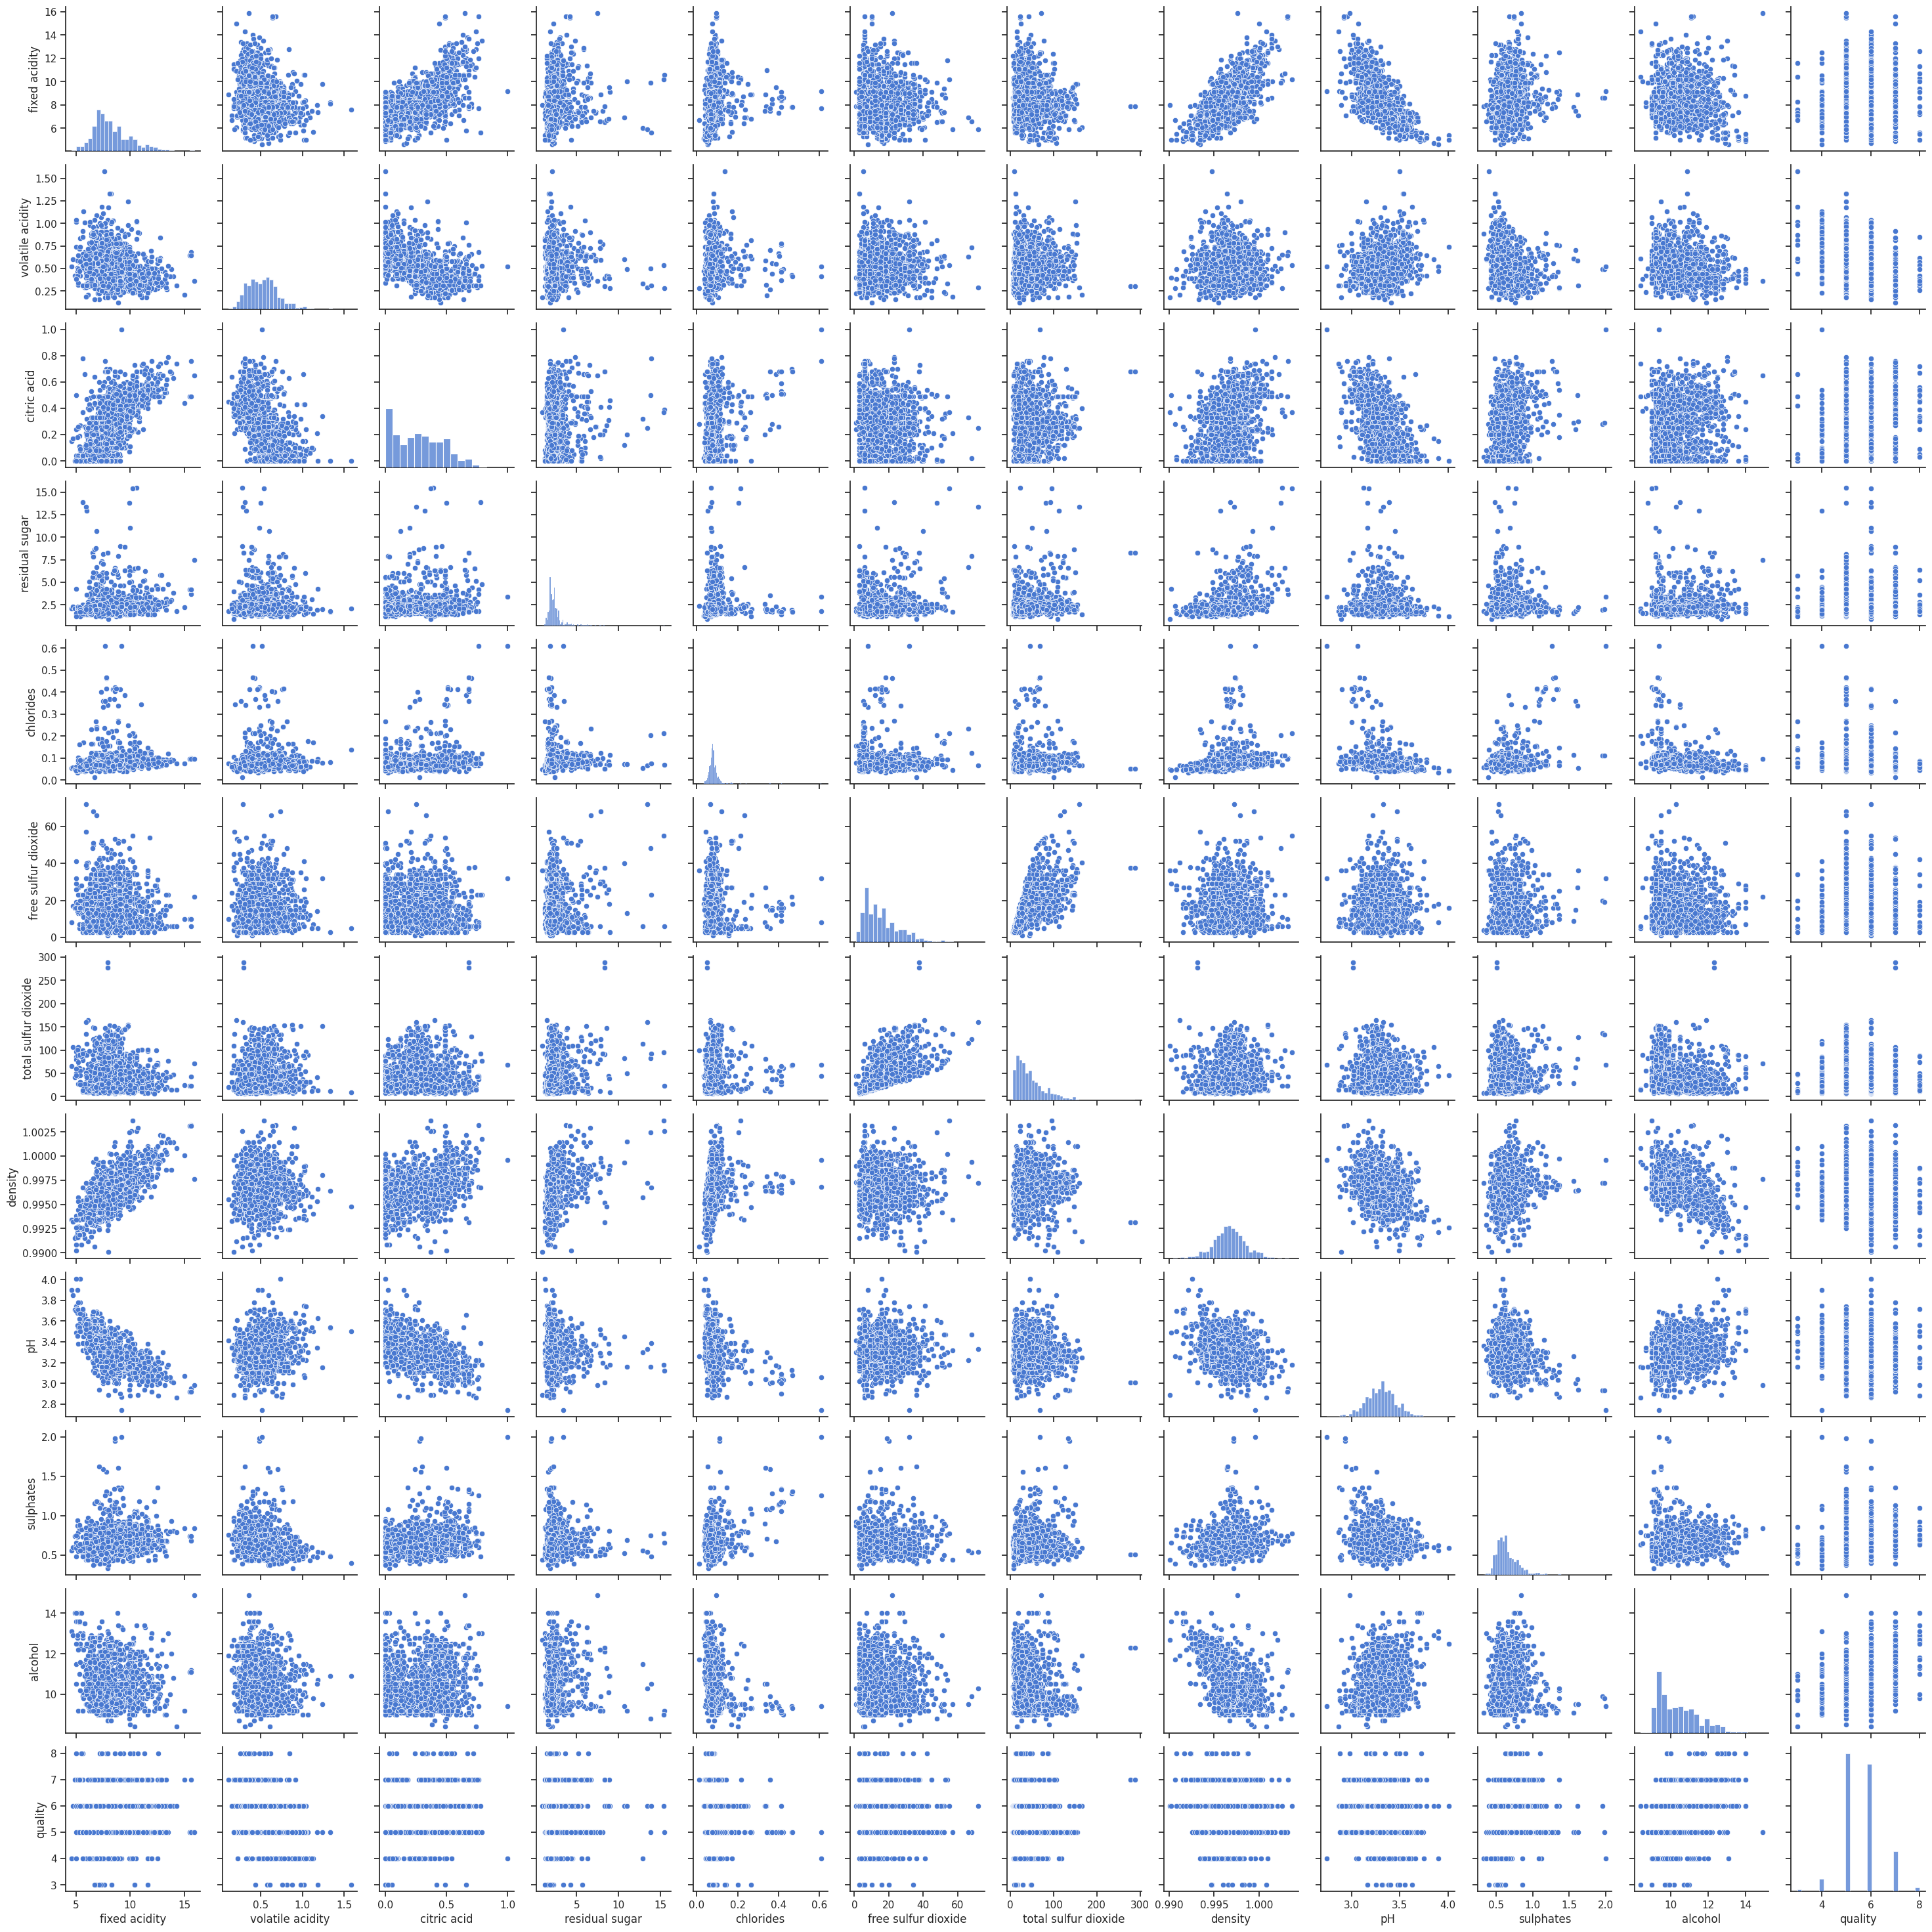

In [ ]:
sns.set(style="ticks", palette="muted")
sns.pairplot(df)

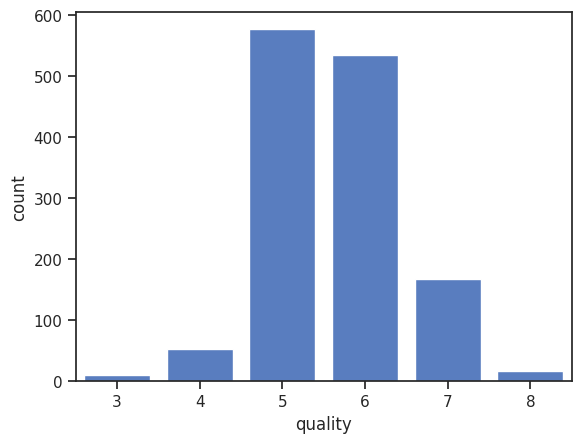

In [ ]:
sns.countplot(x='quality', data=df)
plt.show()

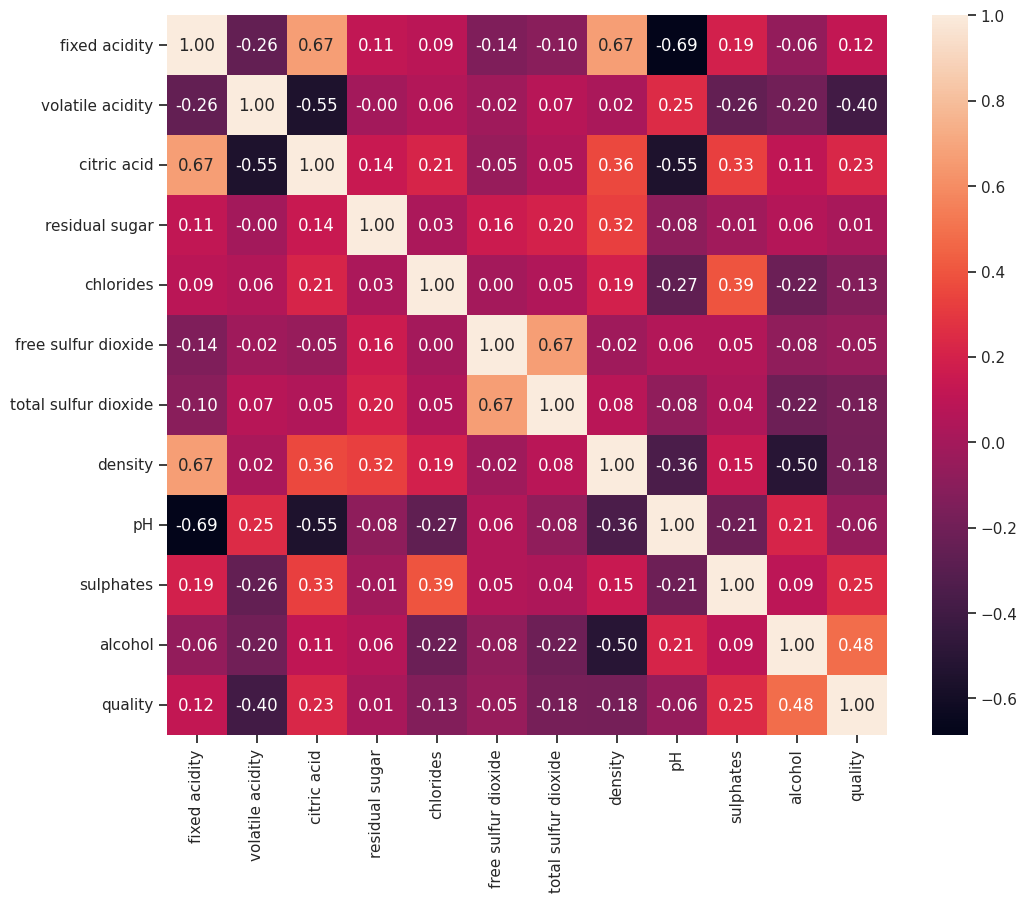

In [ ]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f")


plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)


plt.show()

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='fixed acidity'>

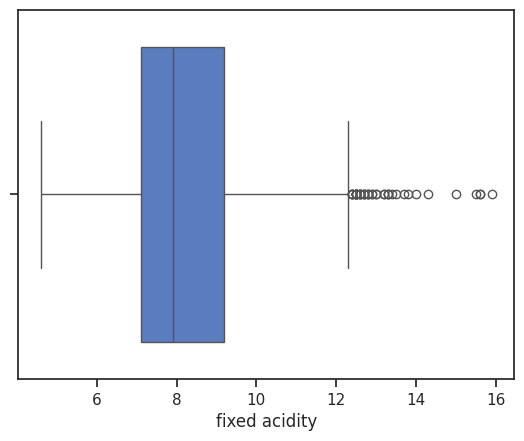

In [ ]:
sns.boxplot(data=df, x='fixed acidity')

In [ ]:
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [ ]:
def find_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())

	return df[(df[feature] > max_boundary) | (df[feature] < min_boundary)].shape

In [ ]:
def remove_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())
	new_df = df[(df[feature] < max_boundary) & (df[feature] > min_boundary)]
	return new_df

In [ ]:
find_outliers_using_three_sigma_rule(df, 'fixed acidity')

(9, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'fixed acidity')

In [ ]:
new_df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1473            6.1              0.60         0.08             1.8      0.071   
1354            7.2              0.58         0.03             2.3      0.077   
192             6.8              0.63         0.12             3.8      0.099   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1473                 14.0                  45.0  0.99336  3.38       0.54   
1354                  7.0                  28.0  0.99568  3.35       0.52   
192                  16.0                 126.0  0.99690  3.28       0.61   

      alcohol  quality  
1473     11.0        5  
1354     10.0        5  
192       9.5        5

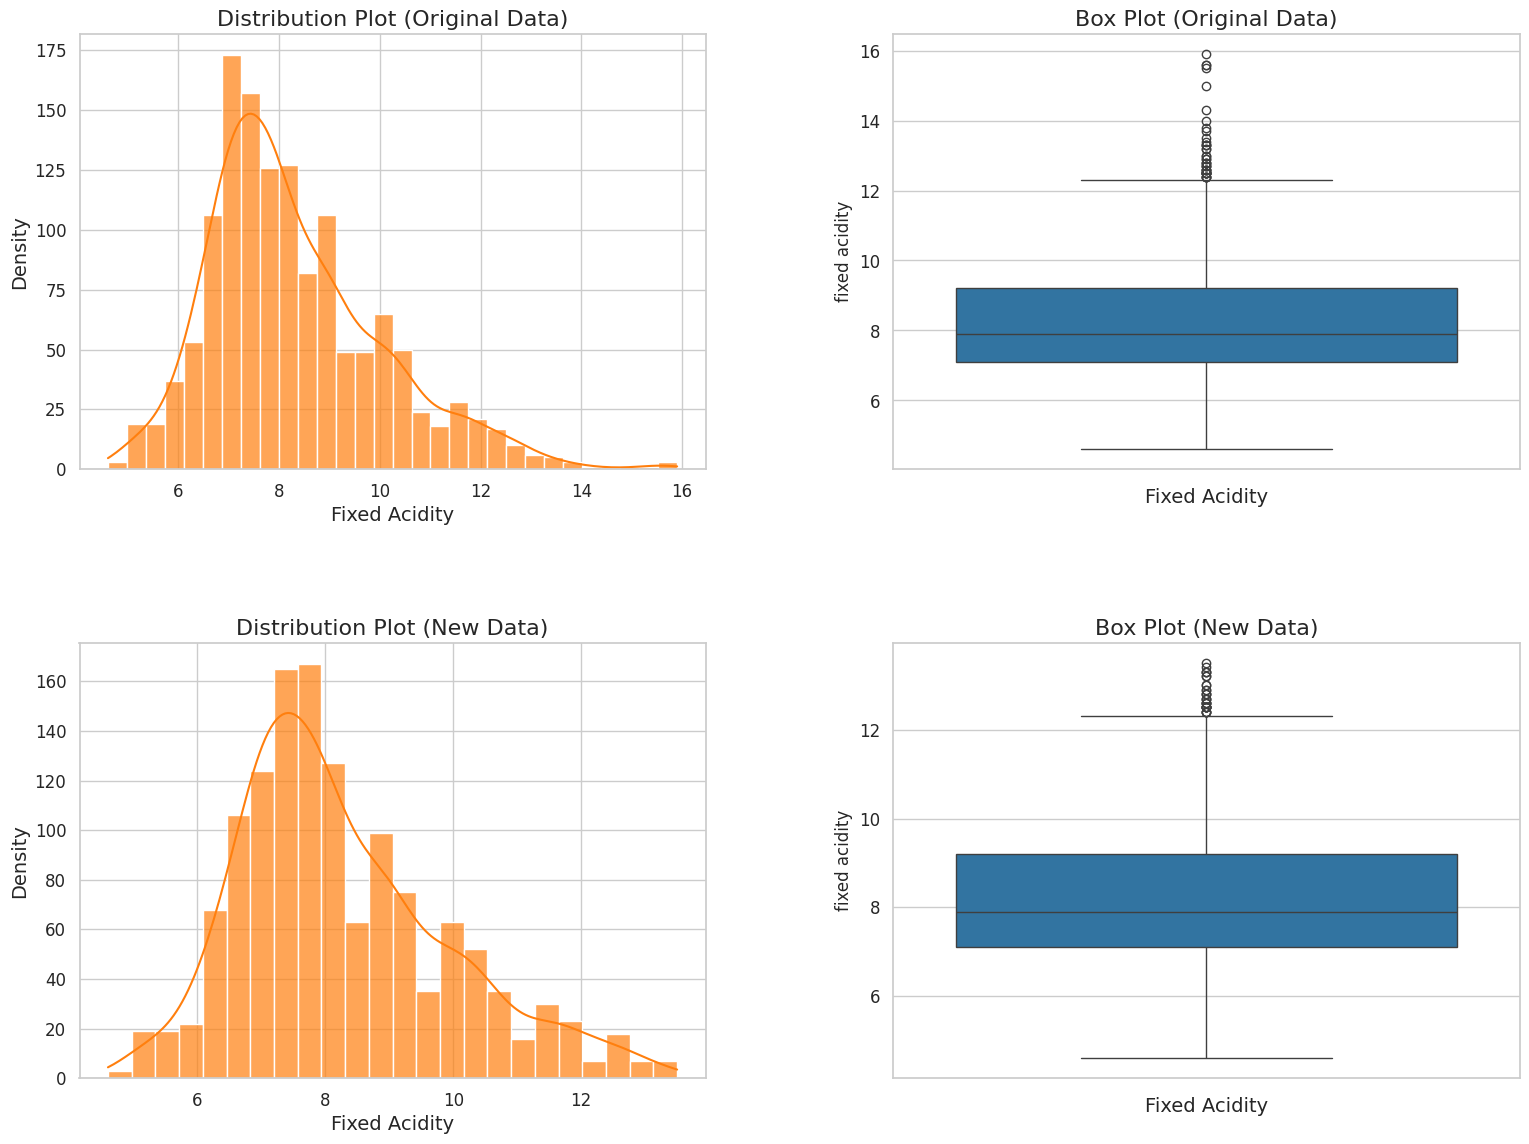

In [ ]:
sns.set_style("whitegrid")


colors = [ '#ff7f0e' , '#1f77b4']


plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(2, 2, 2)
sns.boxplot(df['fixed acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(2, 2, 3)
sns.histplot(new_df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(2, 2, 4)
sns.boxplot(new_df['fixed acidity'], color=colors[1])
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

plt.show()

<Axes: xlabel='fixed acidity', ylabel='Density'>

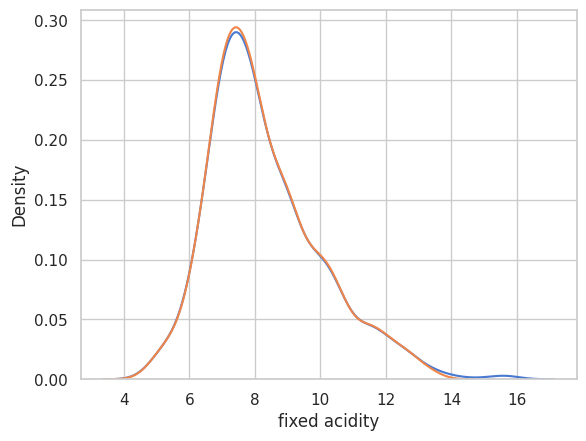

In [ ]:
sns.kdeplot(df['fixed acidity'], label='Original Data')
sns.kdeplot(new_df['fixed acidity'], label='New Data')

In [ ]:
df['fixed acidity'].describe(), new_df['fixed acidity'].describe()

(count    1359.000000
 mean        8.310596
 std         1.736990
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        15.900000
 Name: fixed acidity, dtype: float64,
 count    1350.000000
 mean        8.267185
 std         1.657697
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        13.500000
 Name: fixed acidity, dtype: float64)

In [ ]:
df = new_df

In [ ]:
df.shape

(1350, 12)

<Axes: xlabel='volatile acidity'>

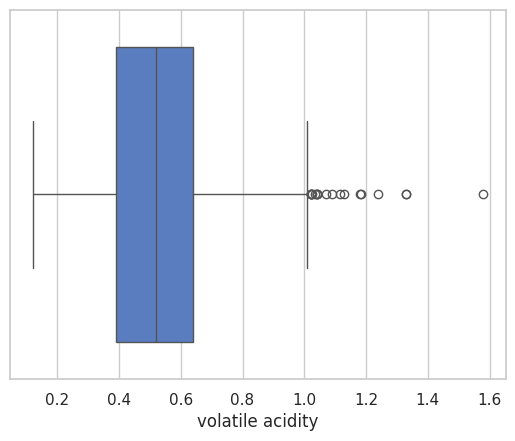

In [ ]:
sns.boxplot(data=df, x='volatile acidity')

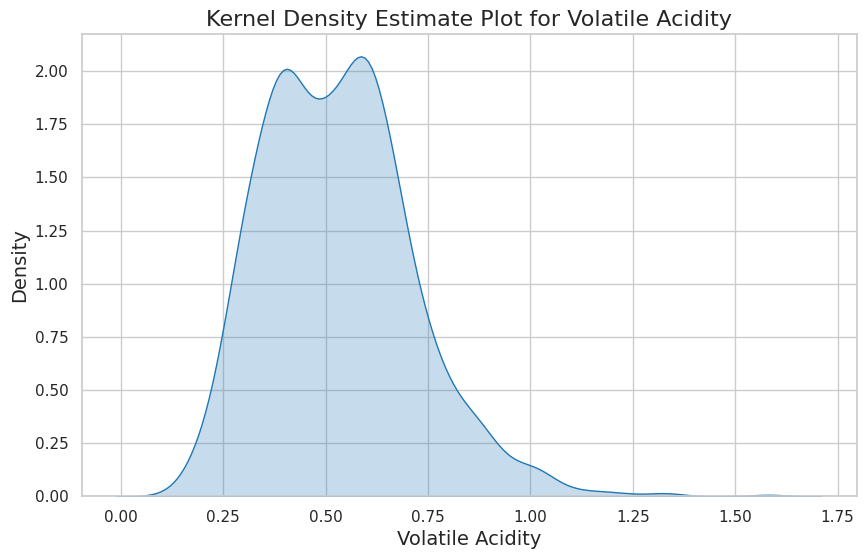

In [ ]:

sns.set_style("whitegrid")


color = '#1f77b4'


plt.figure(figsize=(10, 6))


sns.kdeplot(df['volatile acidity'], color=color, fill=True)

plt.title('Kernel Density Estimate Plot for Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.show()

In [ ]:
def find_outliers_using_interquartile_range(df, feature):
    percentile_25 = df[feature].quantile(0.25)
    percentile_75 = df[feature].quantile(0.75)

    iqr = percentile_75 - percentile_25

    lower_limit = percentile_25 - 1.5 * iqr
    upper_limit = percentile_75 + 1.5 * iqr

    return df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].shape

In [ ]:
def remove_outliers_using_interquartile_range(df, feature):
	percentile_25 = df[feature].quantile(0.25)
	percentile_75 = df[feature].quantile(0.75)
	iqr = percentile_75 - percentile_25
	lower_limit = percentile_25 - 1.5 * iqr
	upper_limit = percentile_75 + 1.5 * iqr
	return df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [ ]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'volatile acidity')

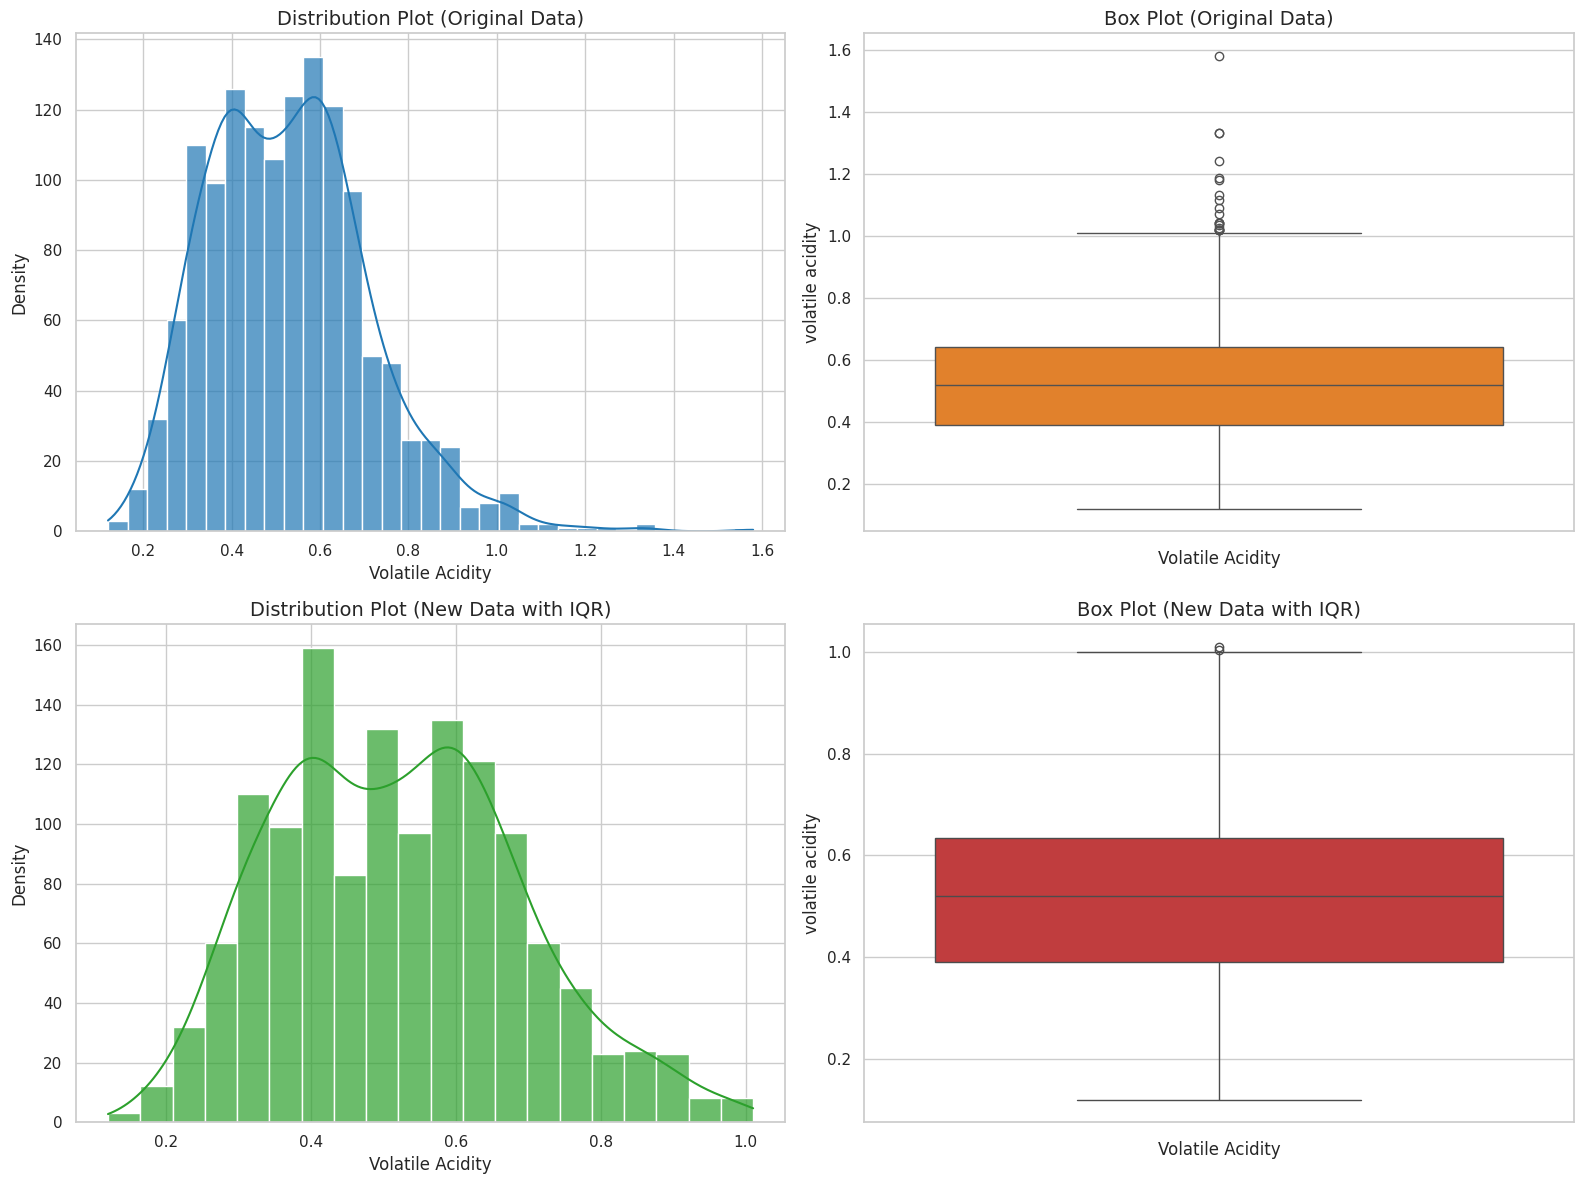

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(df['volatile acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)


plt.subplot(2, 2, 2)
sns.boxplot(df['volatile acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)


plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['volatile acidity'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)


plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['volatile acidity'], color=colors[3])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)

plt.tight_layout()


plt.show()

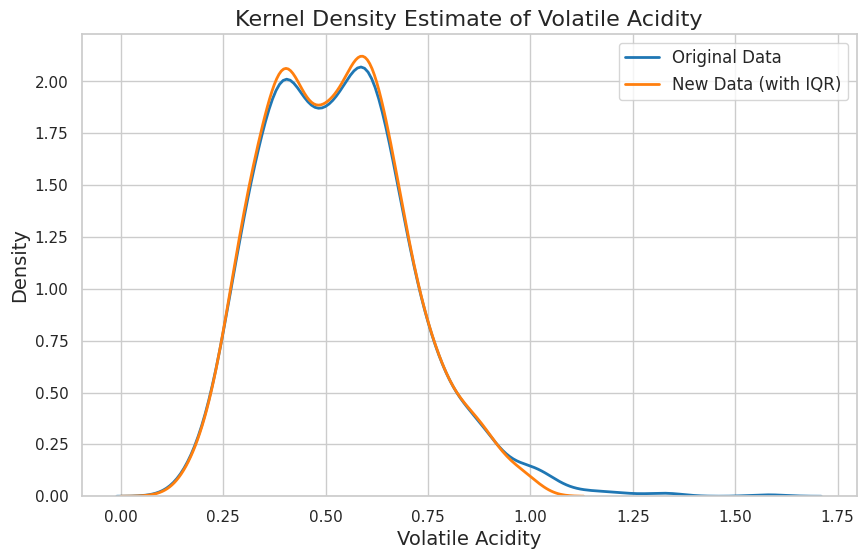

In [ ]:
sns.set_style("whitegrid")


colors = ['#1f77b4', '#ff7f0e']


plt.figure(figsize=(10, 6))


sns.kdeplot(df['volatile acidity'], color=colors[0], label='Original Data', linewidth=2)


sns.kdeplot(new_df_using_iqr['volatile acidity'], color=colors[1], label='New Data (with IQR)', linewidth=2)


plt.title('Kernel Density Estimate of Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.legend(fontsize=12)


plt.show()


In [ ]:
df = new_df_using_iqr

In [ ]:
df.shape

(1331, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

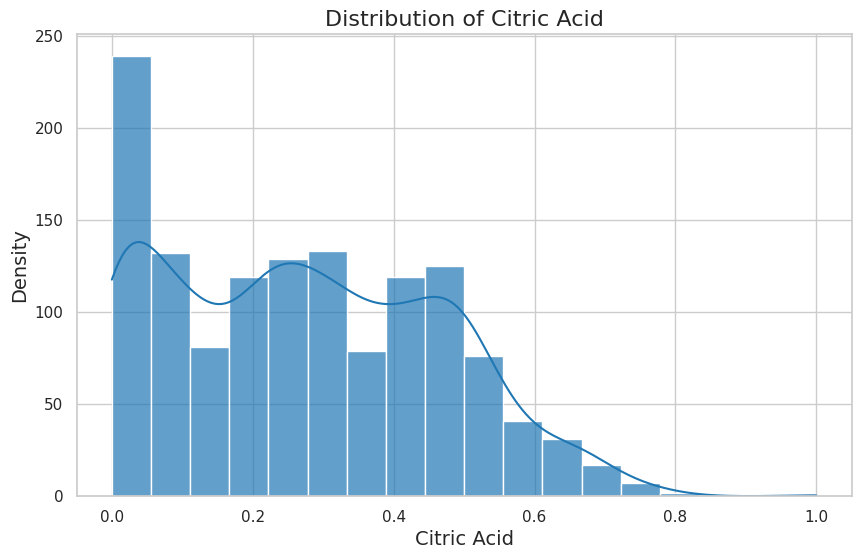

In [ ]:
sns.set_style("whitegrid")

color = '#1f77b4'


plt.figure(figsize=(10, 6))


sns.histplot(df['citric acid'], kde=True, color=color, alpha=0.7)


plt.title('Distribution of Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.show()

<Axes: xlabel='citric acid'>

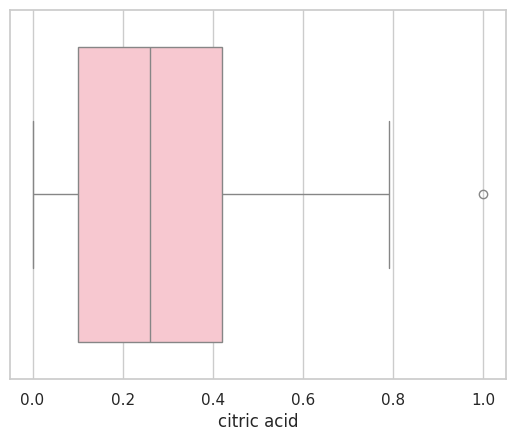

In [ ]:
sns.boxplot(data=df, x='citric acid', color='pink')

In [ ]:
df['citric acid'].describe()

count    1331.000000
mean        0.272141
std         0.193810
min         0.000000
25%         0.100000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [ ]:
df['citric acid'].skew()

0.29930809519912543

In [ ]:
find_outliers_using_interquartile_range(df, 'citric acid')

(1, 12)

In [ ]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'citric acid')

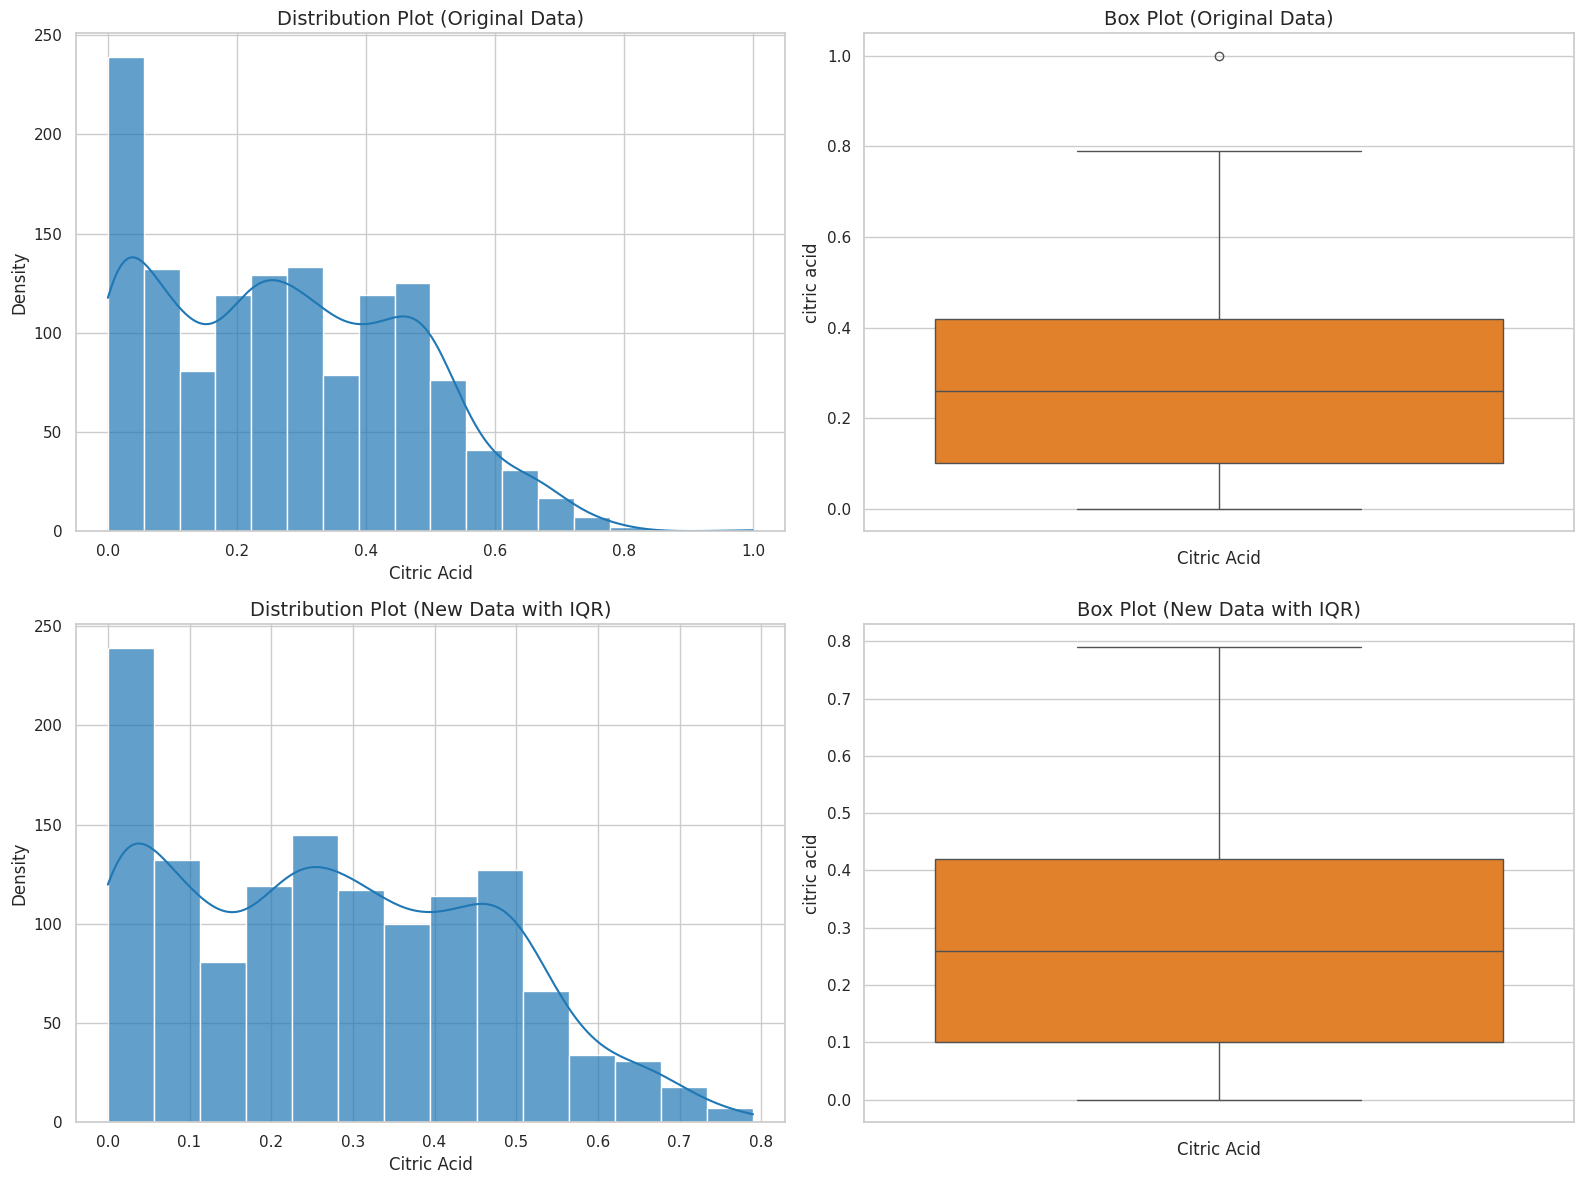

In [ ]:
sns.set_style("whitegrid")

colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(df['citric acid'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['citric acid'], color=colors[1])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:
df = new_df_using_iqr

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

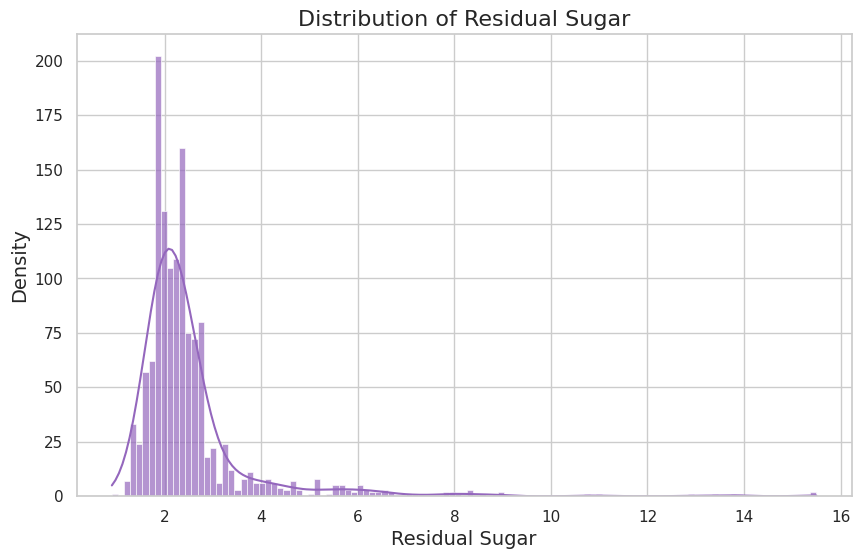

In [ ]:
sns.set_style("whitegrid")

color = '#9467bd'

plt.figure(figsize=(10, 6))

sns.histplot(df['residual sugar'], kde=True, color=color, alpha=0.7)

plt.title('Distribution of Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)


plt.show()

<Axes: ylabel='residual sugar'>

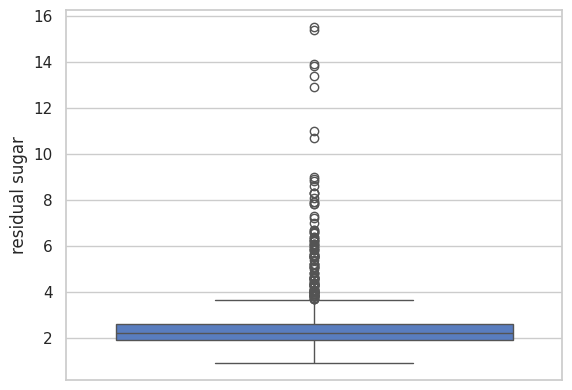

In [ ]:
sns.boxplot(df['residual sugar'])

In [ ]:
def remove_outliers_using_caping(df, feature):
	Q1 = df[feature].quantile(0.25)
	Q3 = df[feature].quantile(0.75)

	IQR = Q3 - Q1

	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	print(upper_bound, lower_bound)


	df[feature+' new'] = np.where(df[feature] > upper_bound, upper_bound,
                                np.where(df[feature] < lower_bound, lower_bound, df[feature]))
	return df


In [ ]:
def remove_outliers_using_imputation(df, feature):
	median_residual_sugar = df[feature].mean()
	Q1 = df[feature].quantile(0.25)
	Q3 = df[feature].quantile(0.75)

	IQR = Q3 - Q1
	df[feature+' new'] = np.where((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)),
                                median_residual_sugar, df[feature])
	return df

In [ ]:
df = remove_outliers_using_imputation(df, 'residual sugar')

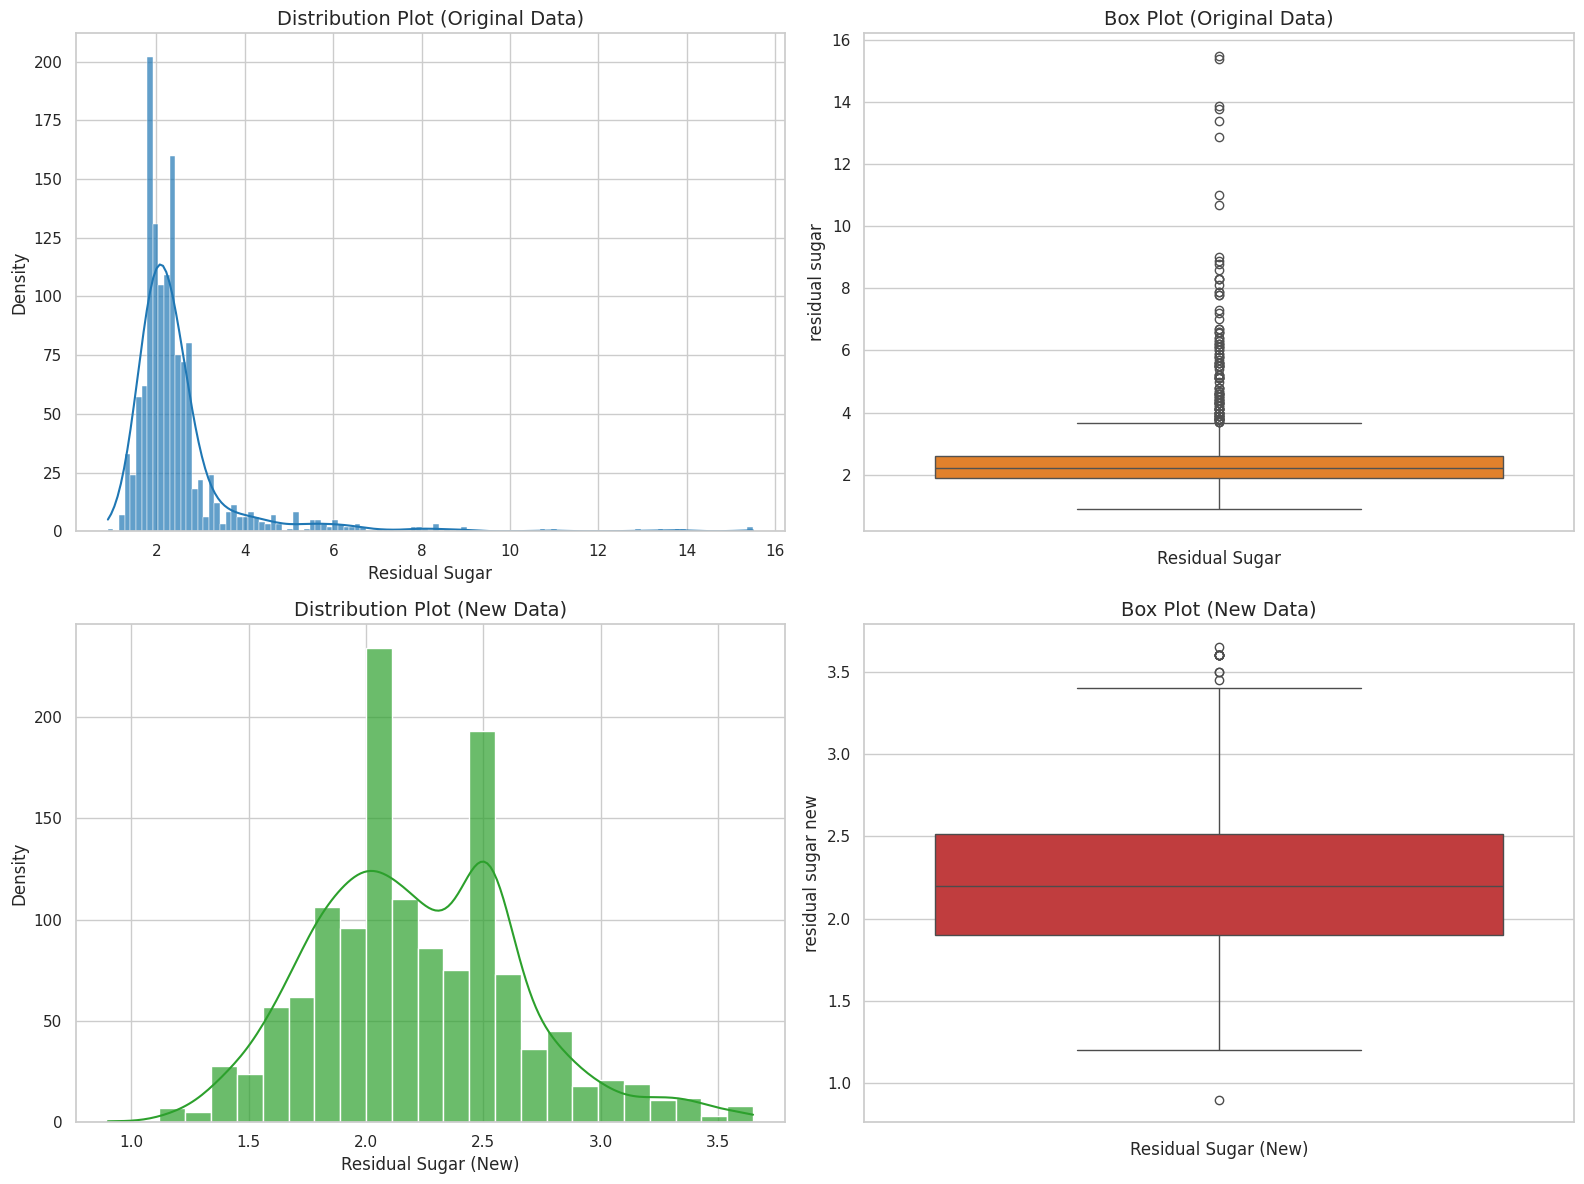

In [ ]:
sns.set_style("whitegrid")

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['residual sugar'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(df['residual sugar'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)


plt.subplot(2, 2, 3)
sns.histplot(df['residual sugar new'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)
plt.ylabel('Density', fontsize=12)


plt.subplot(2, 2, 4)
sns.boxplot(df['residual sugar new'], color=colors[3])
plt.title('Box Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)


plt.tight_layout()
plt.show()

In [ ]:
df['residual sugar'].describe(), df['residual sugar new'].describe()

(count    1330.000000
 mean        2.515677
 std         1.350897
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.600000
 max        15.500000
 Name: residual sugar, dtype: float64,
 count    1330.000000
 mean        2.216628
 std         0.442816
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.515677
 max         3.650000
 Name: residual sugar new, dtype: float64)

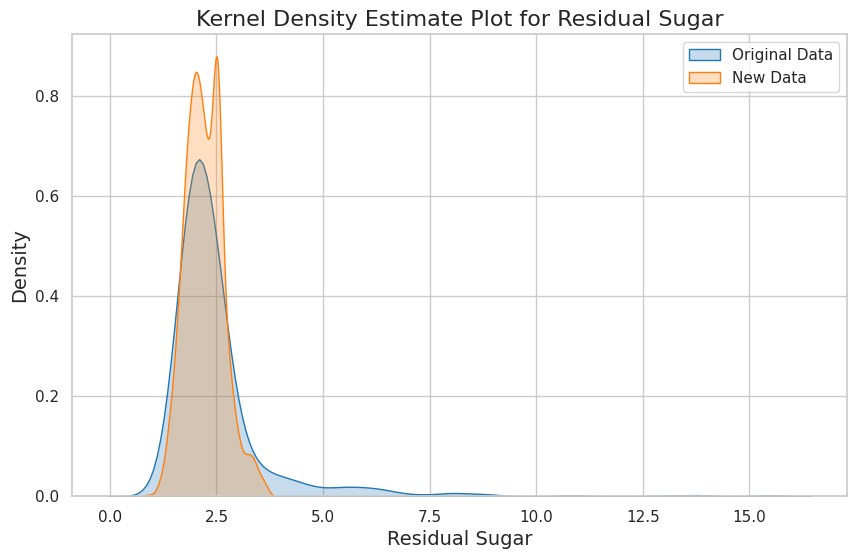

In [ ]:
sns.set_style("whitegrid")


color1 = '#1f77b4'
color2 = '#ff7f0e'


plt.figure(figsize=(10, 6))


sns.kdeplot(df['residual sugar'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['residual sugar new'], color=color2, fill=True, label='New Data')


plt.title('Kernel Density Estimate Plot for Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend()

plt.show()

In [ ]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
364            12.8             0.615         0.66             5.8      0.083   
188             7.9             0.500         0.33             2.0      0.084   
1053            8.3             0.330         0.42             2.3      0.070   
479             9.4             0.685         0.11             2.7      0.077   
1369            6.6             0.610         0.00             1.6      0.069   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
364                   7.0                  42.0  1.00220  3.07       0.73   
188                  15.0                 143.0  0.99680  3.20       0.55   
1053                  9.0                  20.0  0.99426  3.38       0.77   
479                   6.0                  31.0  0.99840  3.19       0.70   
1369                  4.0                   8.0  0.99396  3.33       0.37   

      alcohol  quality  residual sugar new  
364      10.0        7            2.515677  
188       9.5        5            2.000000  
1053     12.7        7            2.300000  
479      10.1        6            2.700000  
1369     10.4        4            1.600000

In [ ]:
df['residual sugar'] = df['residual sugar new']

In [ ]:
df.drop(['residual sugar new'], axis=1, inplace=True)

In [ ]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
955             8.5             0.210         0.52        1.900000      0.090   
197            11.5             0.300         0.60        2.000000      0.067   
1288            7.0             0.600         0.30        2.515677      0.068   
1545            6.5             0.630         0.33        1.800000      0.059   
64              7.2             0.725         0.05        2.515677      0.086   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
955                   9.0                  23.0  0.99648  3.36       0.67   
197                  12.0                  27.0  0.99810  3.11       0.97   
1288                 20.0                 110.0  0.99914  3.30       1.17   
1545                 16.0                  28.0  0.99531  3.36       0.64   
64                    4.0                  11.0  0.99620  3.41       0.39   

      alcohol  quality  
955      10.4        5  
197      10.1        6  
1288     10.2        5  
1545     10.1        6  
64       10.9        5

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

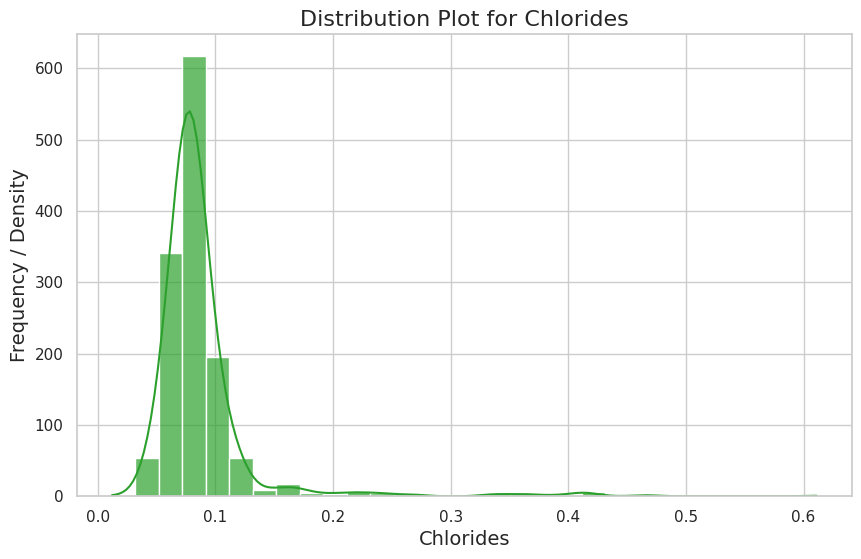

In [ ]:
color = '#2ca02c'


plt.figure(figsize=(10, 6))

sns.histplot(df['chlorides'], kde=True, color=color, bins=30, alpha=0.7)

plt.title('Distribution Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.show()

<Axes: xlabel='chlorides'>

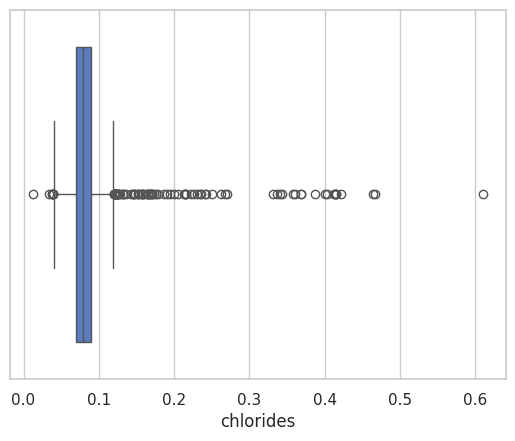

In [ ]:
sns.boxplot(data=df, x='chlorides')

In [ ]:
find_outliers_using_interquartile_range(df, 'chlorides')

(97, 12)

In [ ]:
df = remove_outliers_using_imputation(df, 'chlorides')

In [ ]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1002            9.1             0.290         0.33            2.05      0.063   
110             7.8             0.560         0.19            1.80      0.104   
771             9.4             0.685         0.26            2.40      0.082   
1519            6.6             0.700         0.08            2.60      0.106   
1458            8.4             0.290         0.40            1.70      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1002                 13.0                  27.0  0.99516  3.26       0.84   
110                  12.0                  47.0  0.99640  3.19       0.93   
771                  23.0                 143.0  0.99780  3.28       0.55   
1519                 14.0                  27.0  0.99665  3.44       0.58   
1458                  8.0                  20.0  0.99603  3.39       0.60   

      alcohol  quality  chlorides new  
1002     11.7        7          0.063  
110       9.5        5          0.104  
771       9.4        5          0.082  
1519     10.2        5          0.106  
1458     10.5        5          0.067

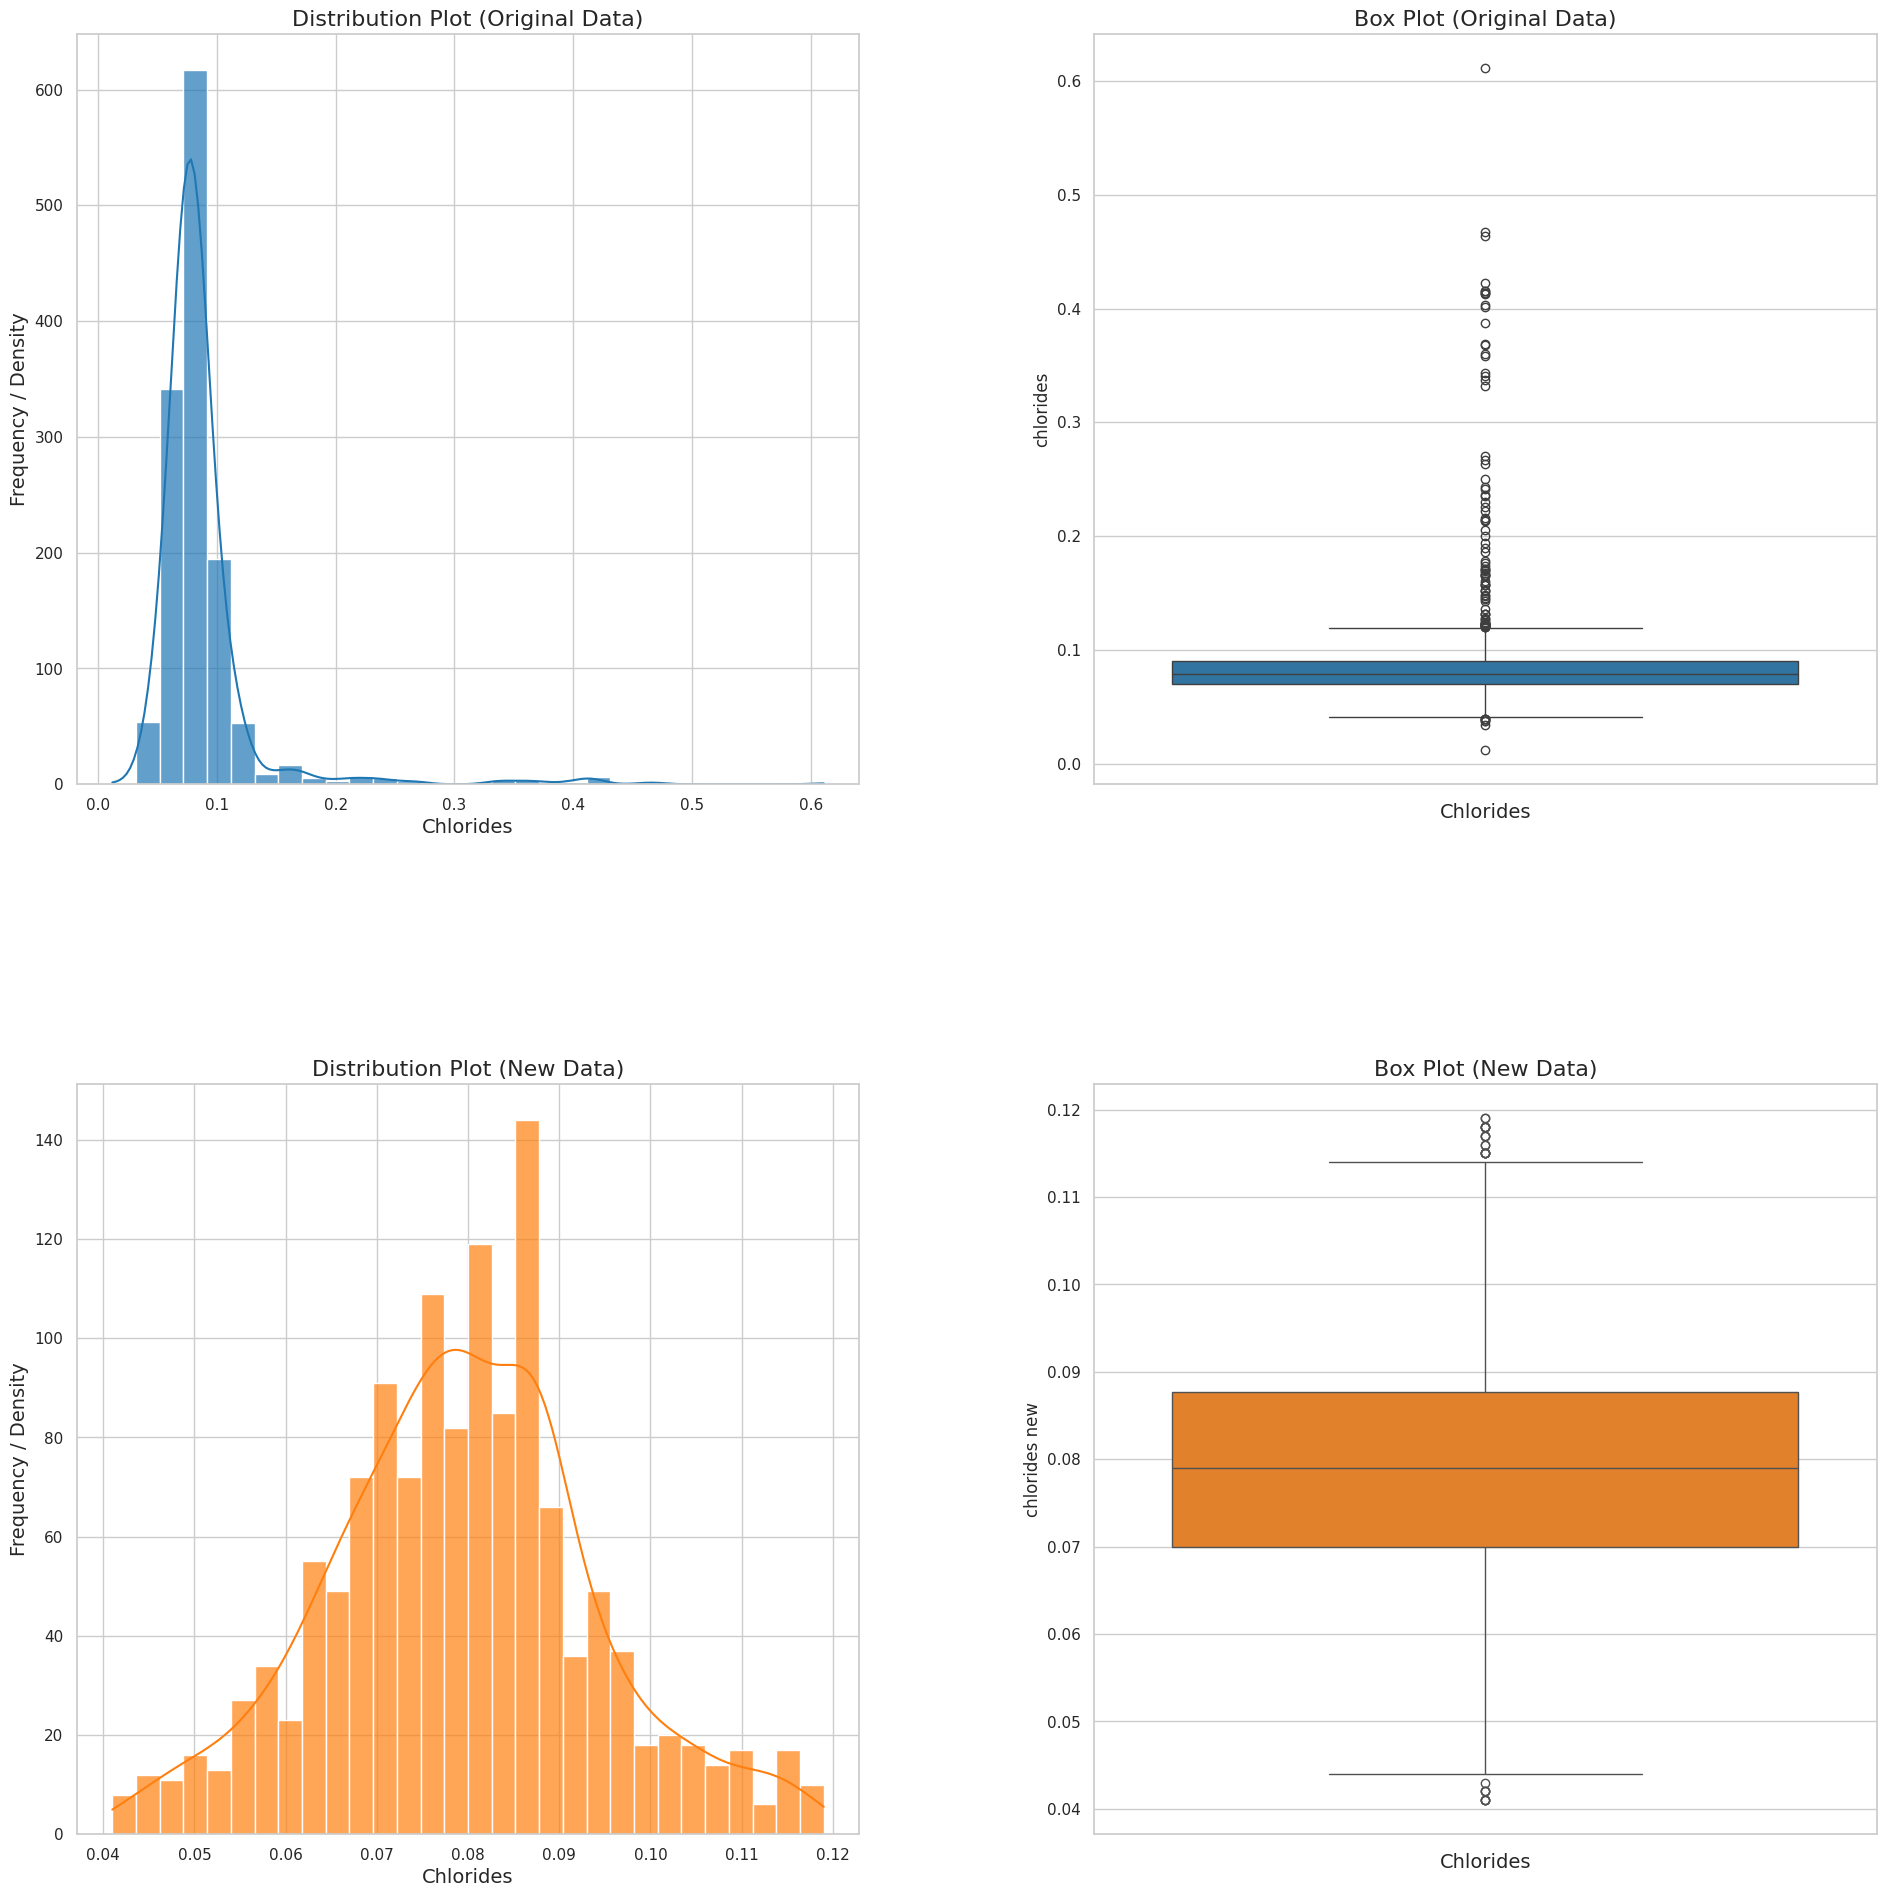

In [ ]:
color1 = '#1f77b4'
color2 = '#ff7f0e'
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['chlorides'], kde=True, color=color1, bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'], color=color1)
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

plt.subplot(2, 2, 3)
sns.histplot(df['chlorides new'], kde=True, color=color2, bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'], color=color2)
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

plt.show()

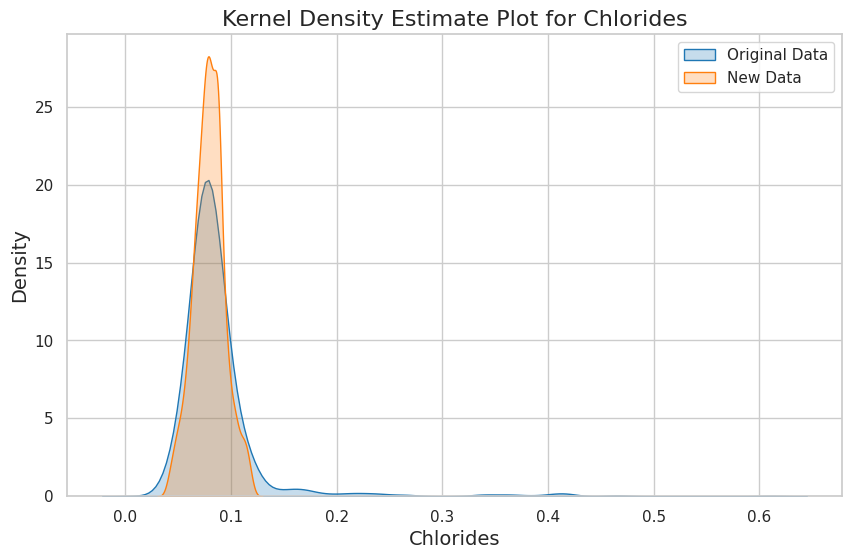

In [ ]:
color1 = '#1f77b4'
color2 = '#ff7f0e'

plt.figure(figsize=(10, 6))

sns.kdeplot(df['chlorides'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['chlorides new'], color=color2, fill=True, label='New Data')

plt.title('Kernel Density Estimate Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend()

plt.show()

<ipython-input-73-8a0d303d3510>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides'])
<ipython-input-73-8a0d303d3510>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides new'])


<Axes: ylabel='chlorides new'>

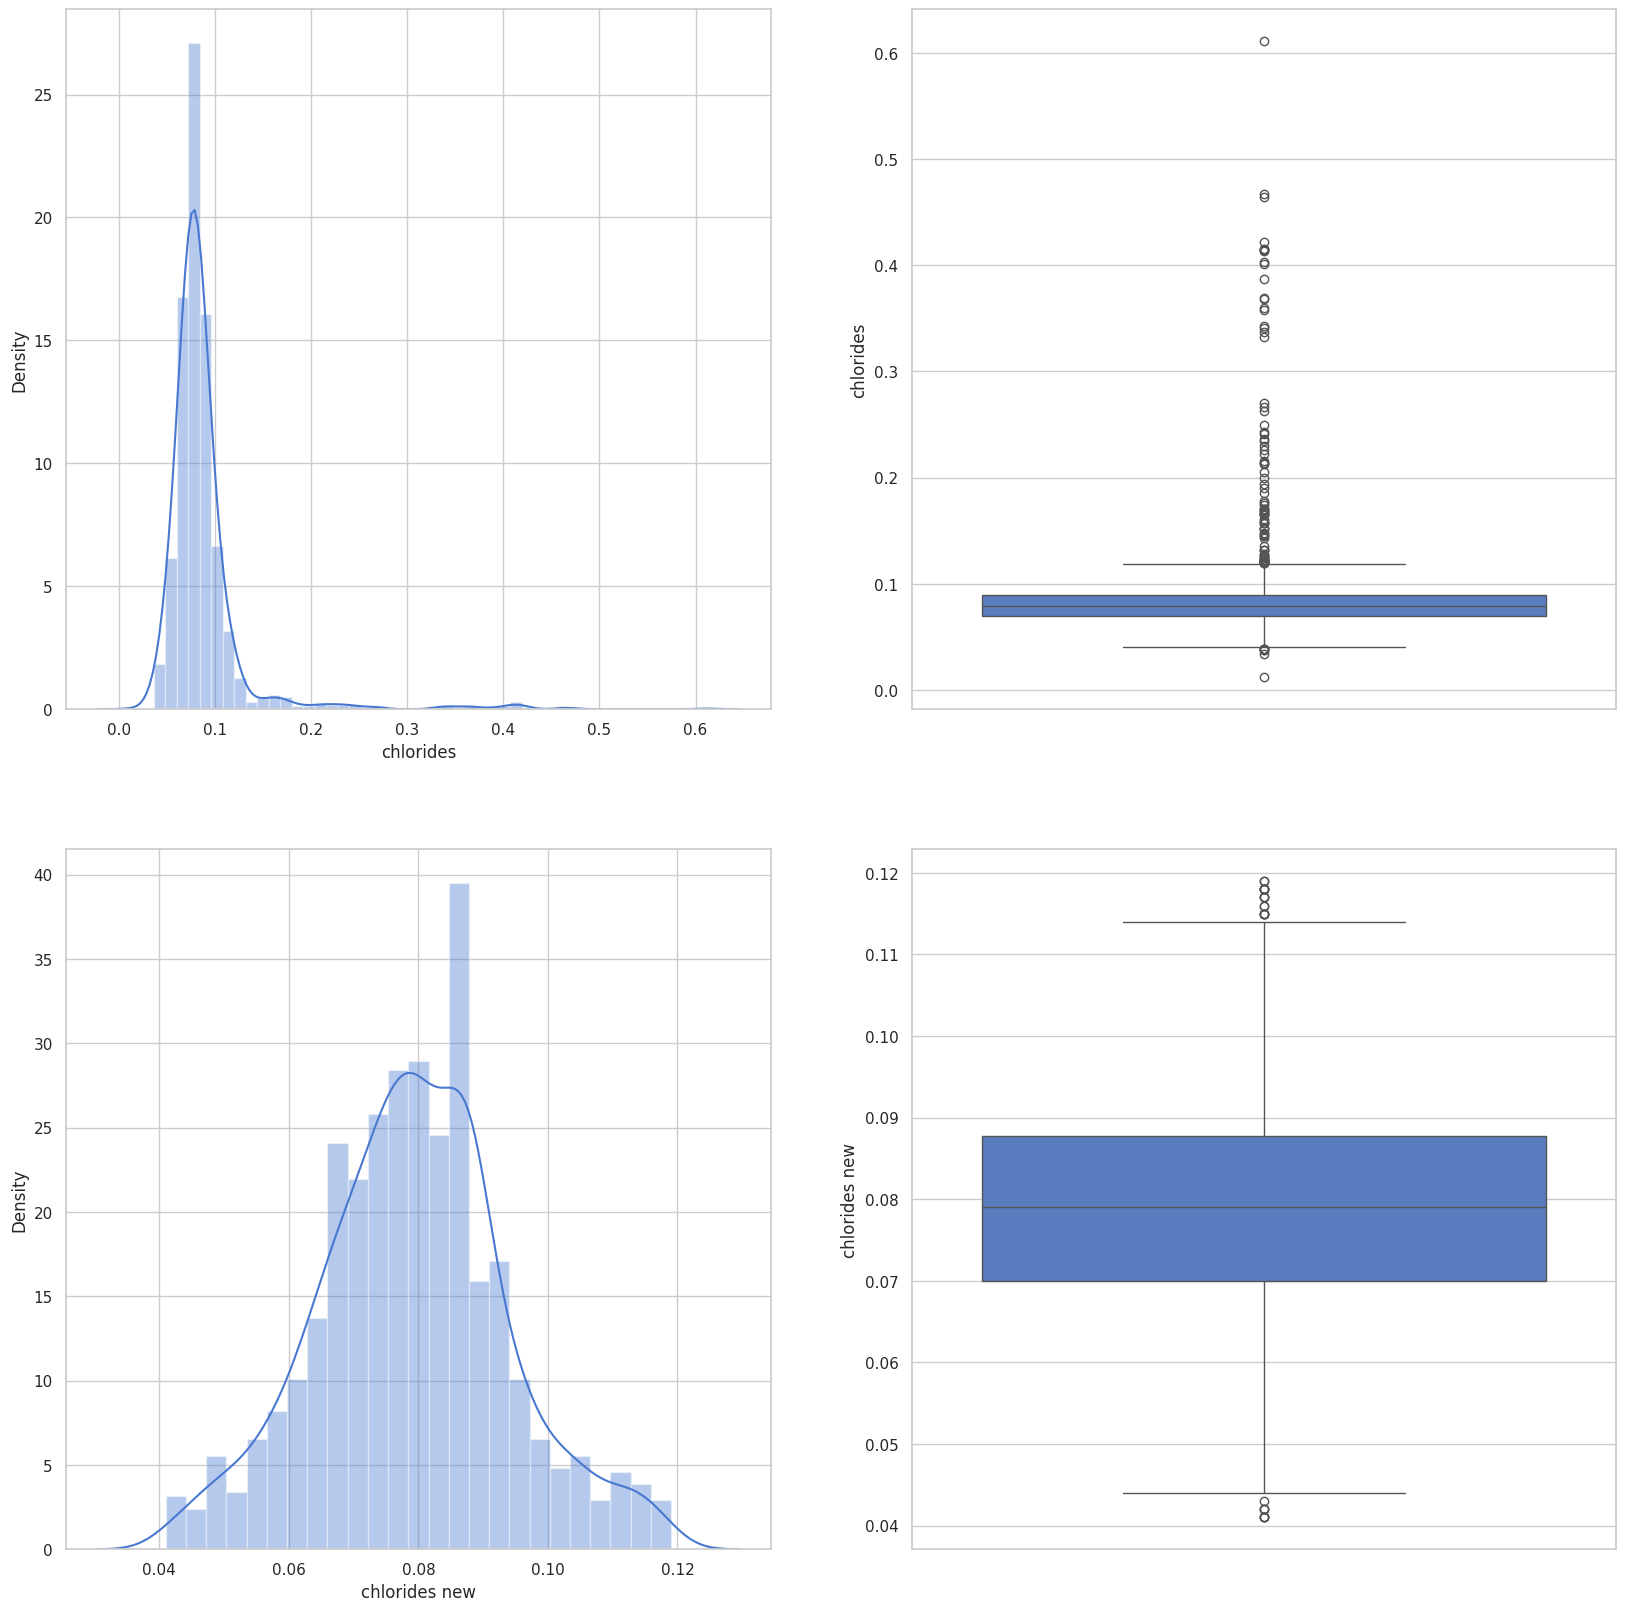

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
sns.distplot(df['chlorides'])

plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'])

plt.subplot(2, 2, 3)
sns.distplot(df['chlorides new'])

plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'])

In [ ]:
df['chlorides'].describe(), df['chlorides new'].describe()

(count    1330.000000
 mean        0.087706
 std         0.047629
 min         0.012000
 25%         0.070000
 50%         0.079000
 75%         0.090000
 max         0.611000
 Name: chlorides, dtype: float64,
 count    1330.000000
 mean        0.079190
 std         0.014677
 min         0.041000
 25%         0.070000
 50%         0.079000
 75%         0.087706
 max         0.119000
 Name: chlorides new, dtype: float64)

In [ ]:
df['chlorides'] = df['chlorides new']

In [ ]:
df.drop('chlorides new', axis=1, inplace=True)

In [ ]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
853            9.3              0.36         0.39        1.500000      0.080   
260            7.9              0.33         0.23        1.700000      0.077   
272           10.9              0.37         0.58        2.515677      0.071   
215            7.0              0.49         0.49        2.515677      0.060   
991            7.1              0.34         0.28        2.000000      0.082   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
853                 41.0                  55.0  0.99652  3.47       0.73   
260                 18.0                  45.0  0.99625  3.29       0.65   
272                 17.0                  65.0  0.99935  3.22       0.78   
215                 26.0                 121.0  0.99740  3.34       0.76   
991                 31.0                  68.0  0.99694  3.45       0.48   

     alcohol  quality  
853     10.9        6  
260      9.3        5  
272     10.1        5  
215     10.5        5  
991      9.4        5

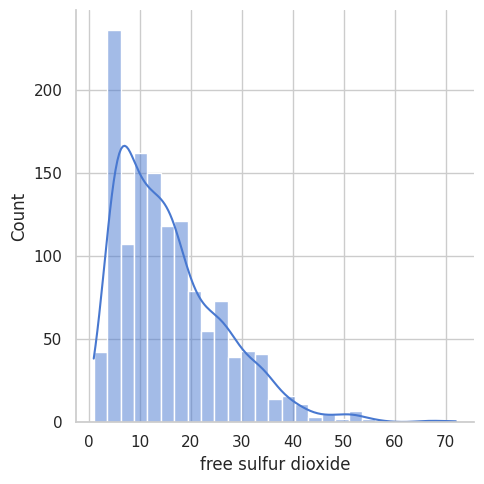

In [ ]:
sns.displot(df['free sulfur dioxide'], kde=True)

<Axes: xlabel='free sulfur dioxide'>

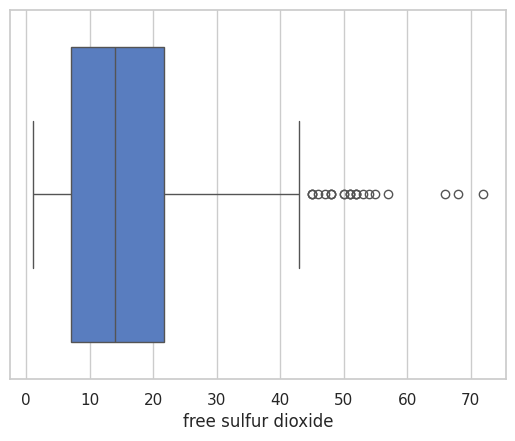

In [ ]:
sns.boxplot(data=df, x='free sulfur dioxide')

In [ ]:
find_outliers_using_interquartile_range(df, 'free sulfur dioxide')

(23, 12)

In [ ]:
df = remove_outliers_using_caping(df, 'free sulfur dioxide')

43.875 -15.125


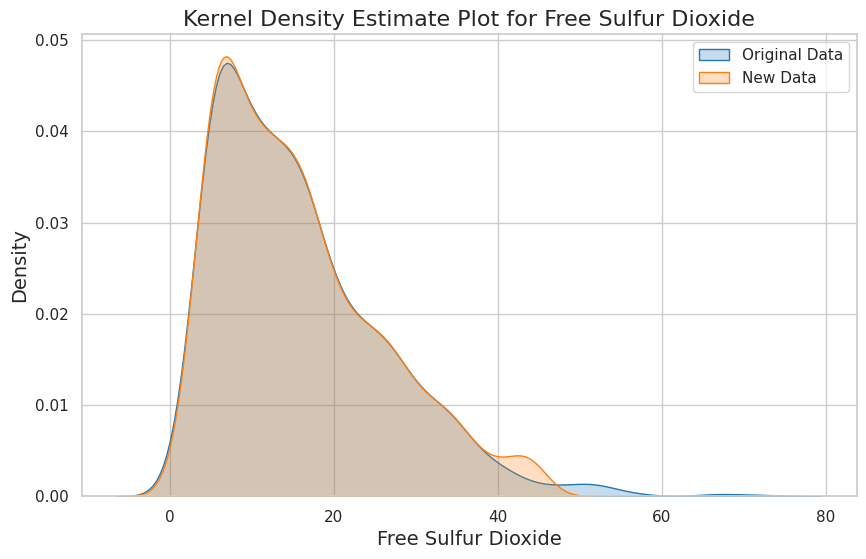

In [ ]:
color1 = '#1f77b4'
color2 = '#ff7f0e'


plt.figure(figsize=(10, 6))


sns.kdeplot(df['free sulfur dioxide'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['free sulfur dioxide new'], color=color2, fill=True, label='New Data')


plt.title('Kernel Density Estimate Plot for Free Sulfur Dioxide', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend()

plt.show()

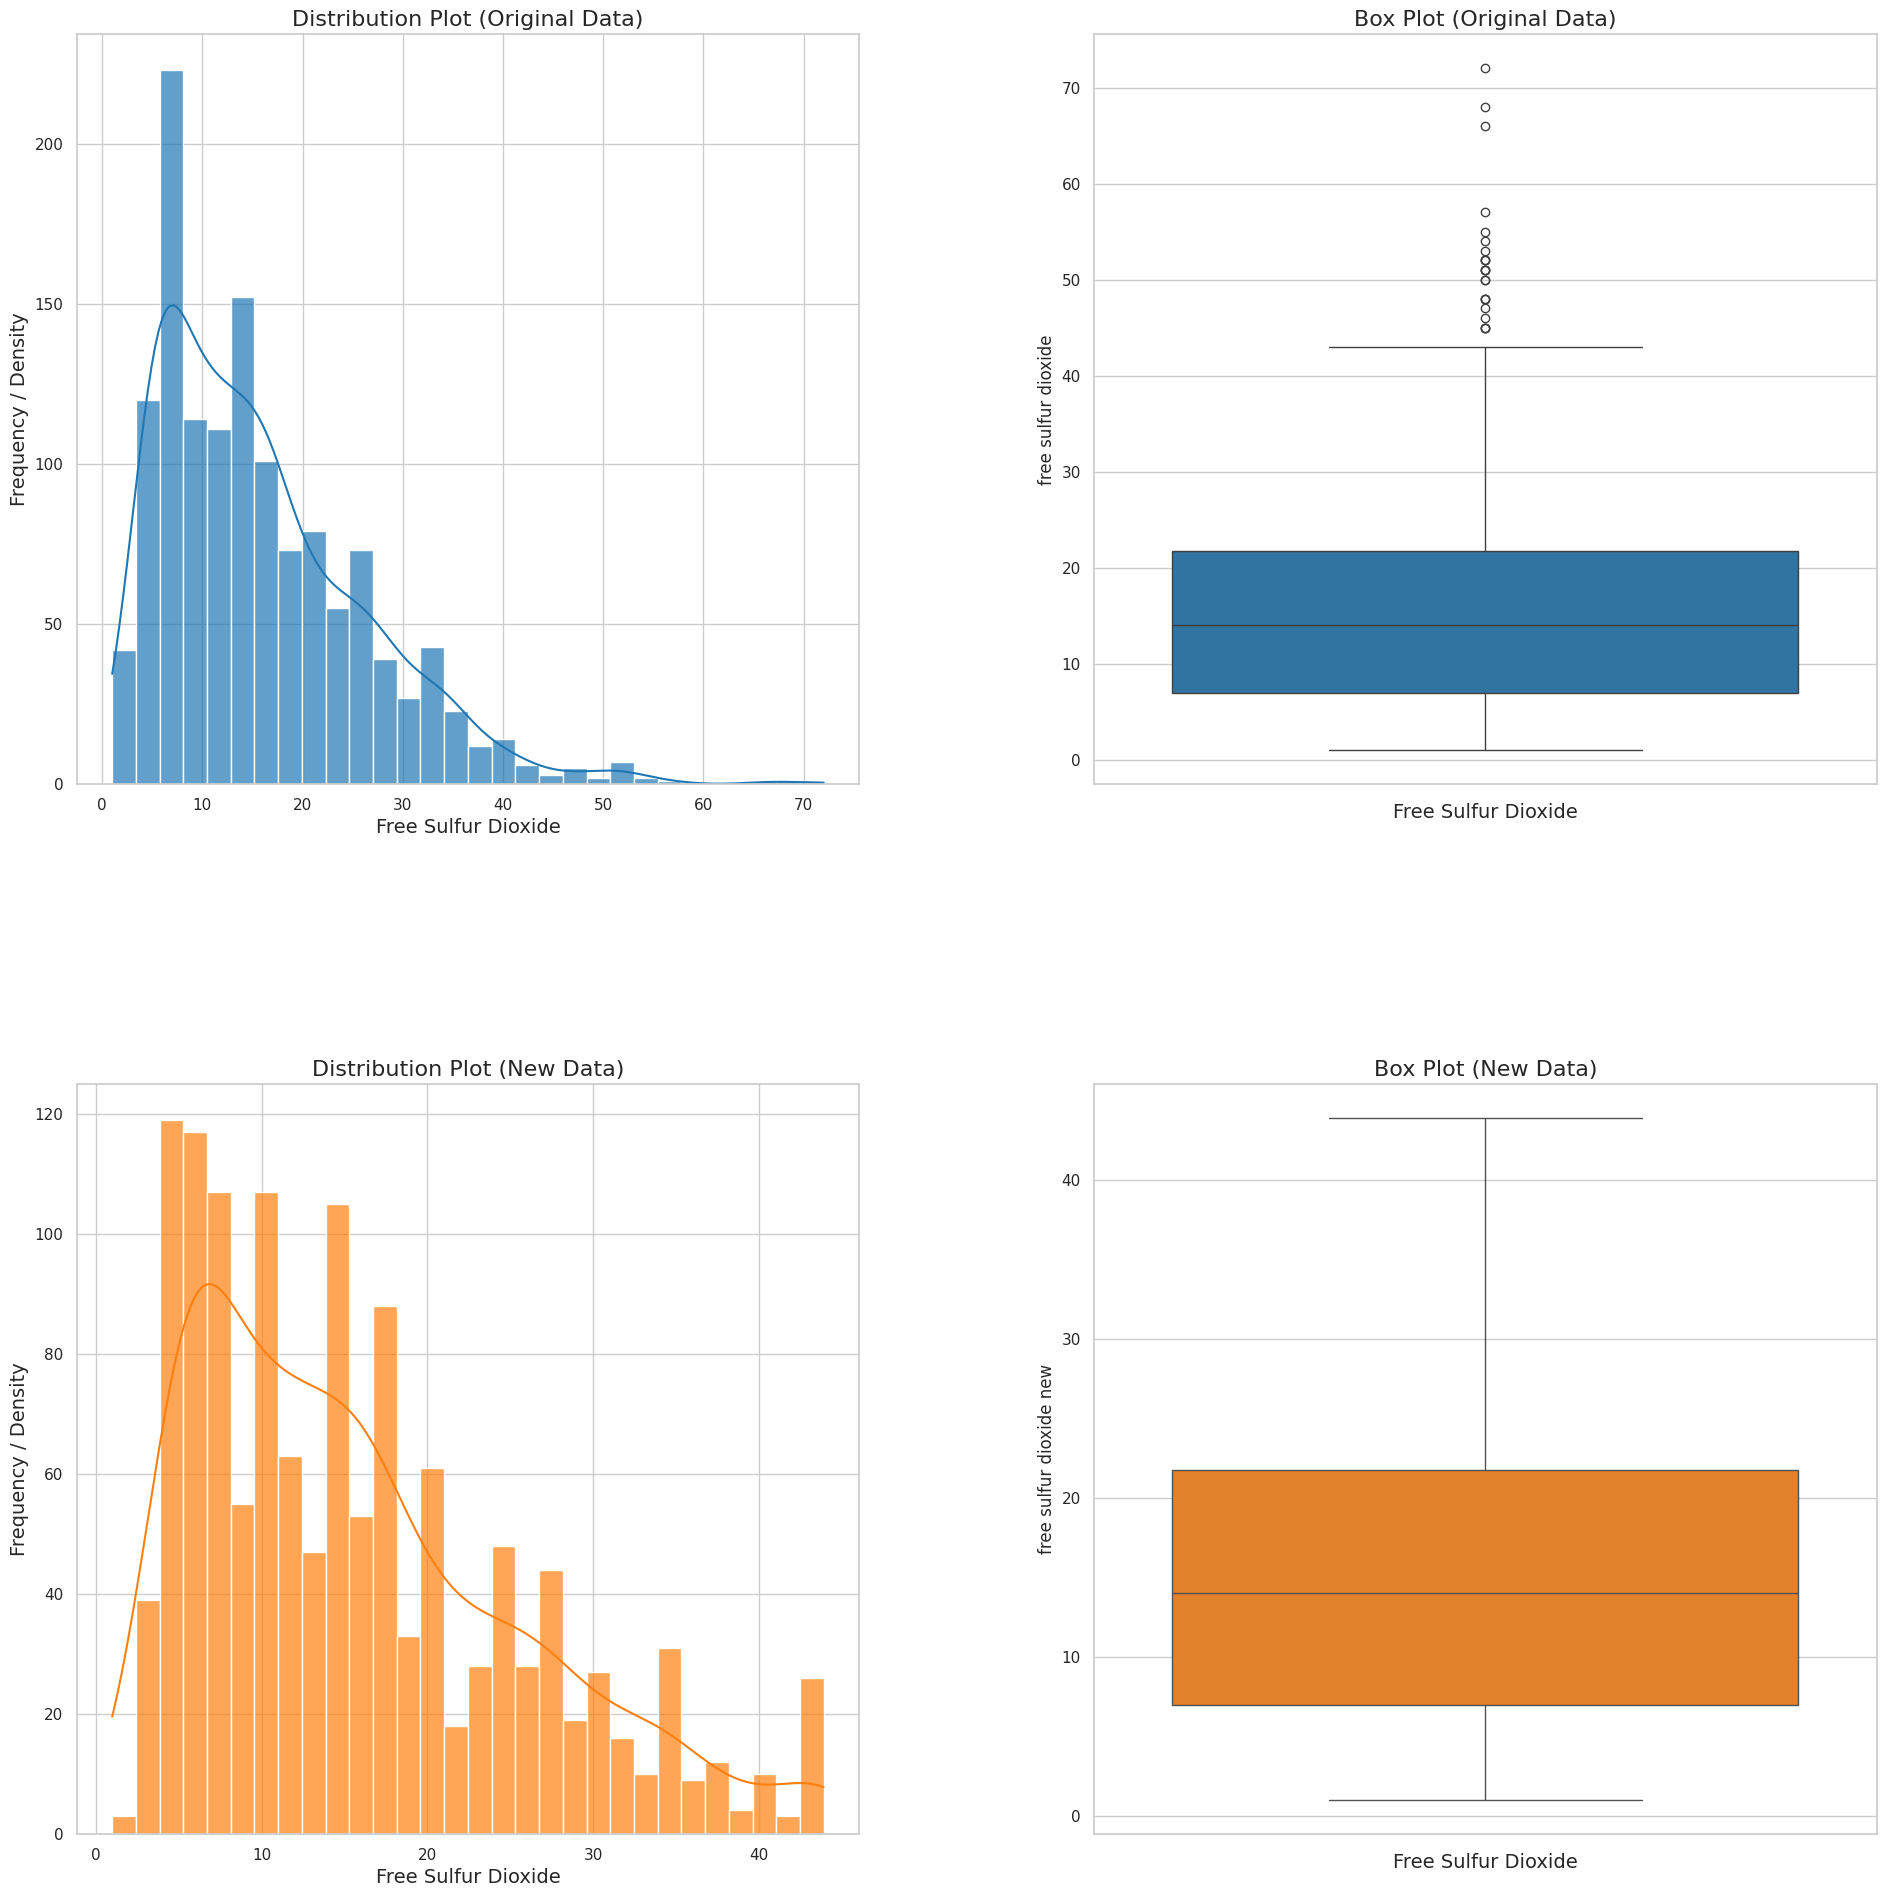

In [ ]:
color1 = '#1f77b4'
color2 = '#ff7f0e'

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['free sulfur dioxide'], kde=True, color=color1, bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.subplot(2, 2, 2)
sns.boxplot(df['free sulfur dioxide'], color=color1)
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

plt.subplot(2, 2, 3)
sns.histplot(df['free sulfur dioxide new'], kde=True, color=color2, bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.subplot(2, 2, 4)
sns.boxplot(df['free sulfur dioxide new'], color=color2)
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)


plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

plt.show()

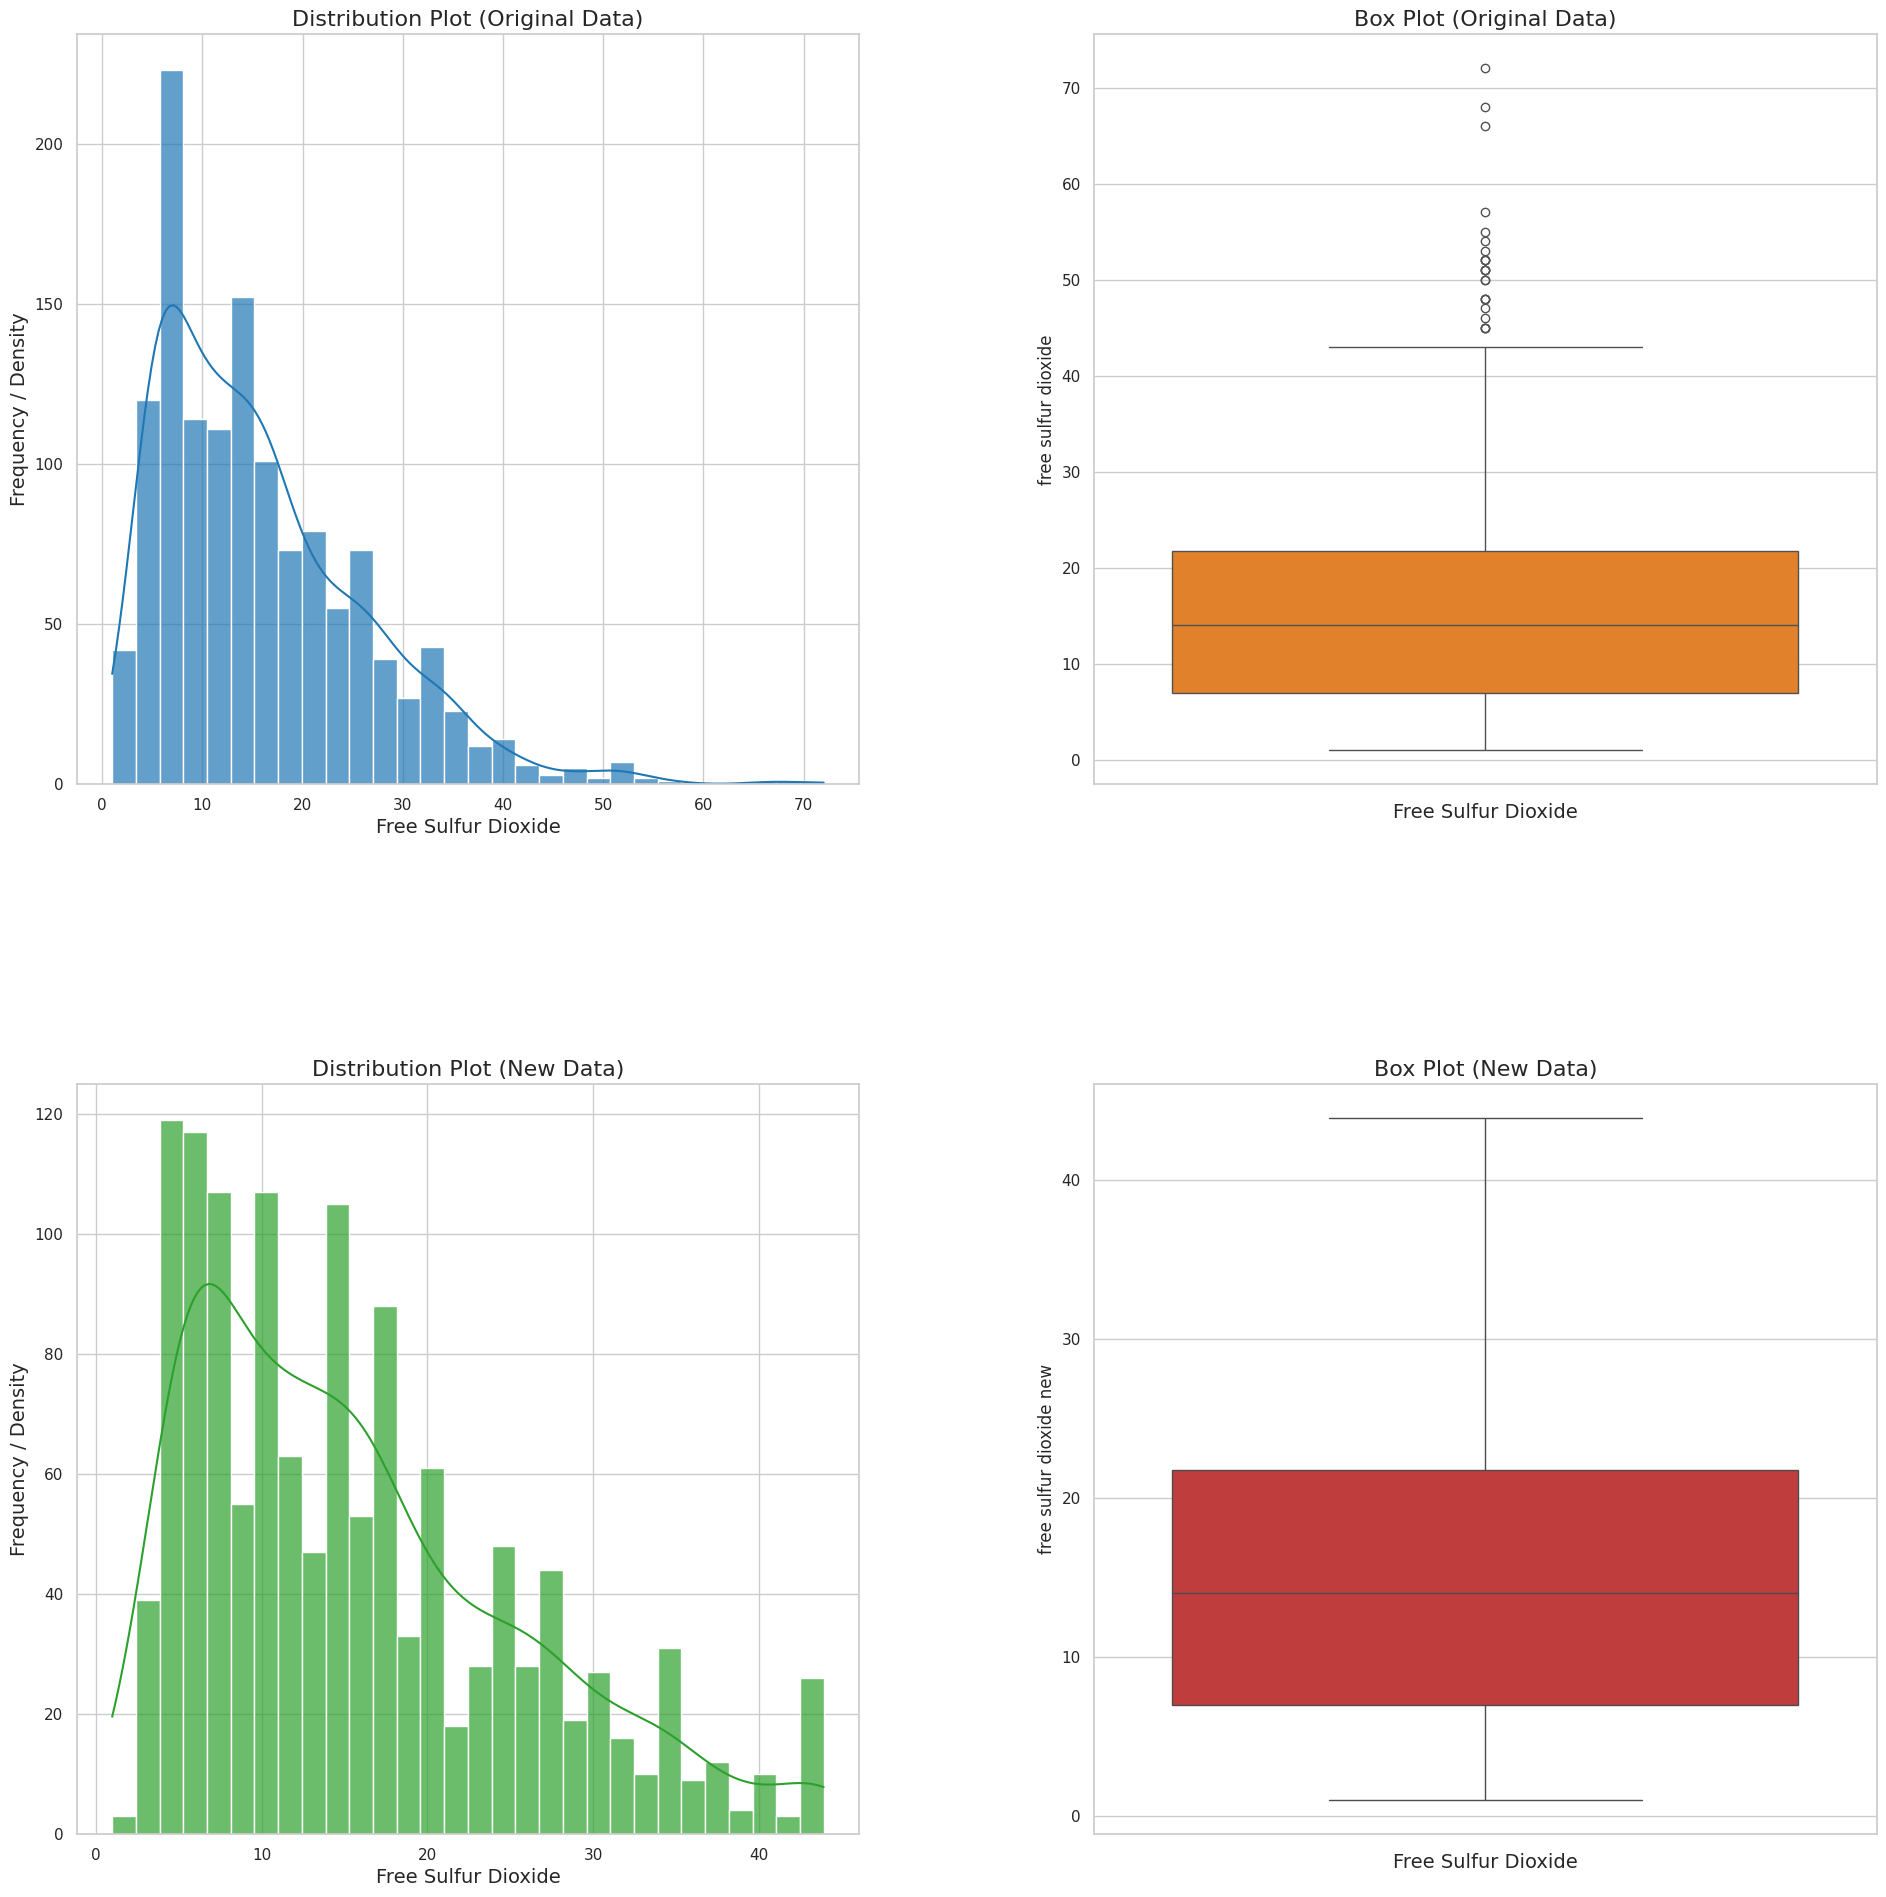

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['free sulfur dioxide'], kde=True, color=colors[0], bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

plt.subplot(2, 2, 2)
sns.boxplot(df['free sulfur dioxide'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

plt.subplot(2, 2, 3)
sns.histplot(df['free sulfur dioxide new'], kde=True, color=colors[2], bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)


plt.subplot(2, 2, 4)
sns.boxplot(df['free sulfur dioxide new'], color=colors[3])
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

plt.show()

In [ ]:
df['free sulfur dioxide'].describe(), df['free sulfur dioxide new'].describe()

(count    1330.000000
 mean       15.933835
 std        10.451946
 min         1.000000
 25%         7.000000
 50%        14.000000
 75%        21.750000
 max        72.000000
 Name: free sulfur dioxide, dtype: float64,
 count    1330.000000
 mean       15.785808
 std         9.940165
 min         1.000000
 25%         7.000000
 50%        14.000000
 75%        21.750000
 max        43.875000
 Name: free sulfur dioxide new, dtype: float64)

In [ ]:
df['free sulfur dioxide'] = df['free sulfur dioxide new']
df.drop('free sulfur dioxide new', axis=1, inplace=True)

In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1344           11.5              0.42         0.48        2.600000      0.077   
645             7.8              0.64         0.10        2.515677      0.115   
1143            7.0              0.22         0.30        1.800000      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1344                  8.0                  20.0  0.99852  3.09       0.53   
645                   5.0                  11.0  0.99840  3.37       0.69   
1143                 16.0                  20.0  0.99672  3.61       0.82   

      alcohol  quality  
1344     11.0        5  
645      10.1        7  
1143     10.0        6

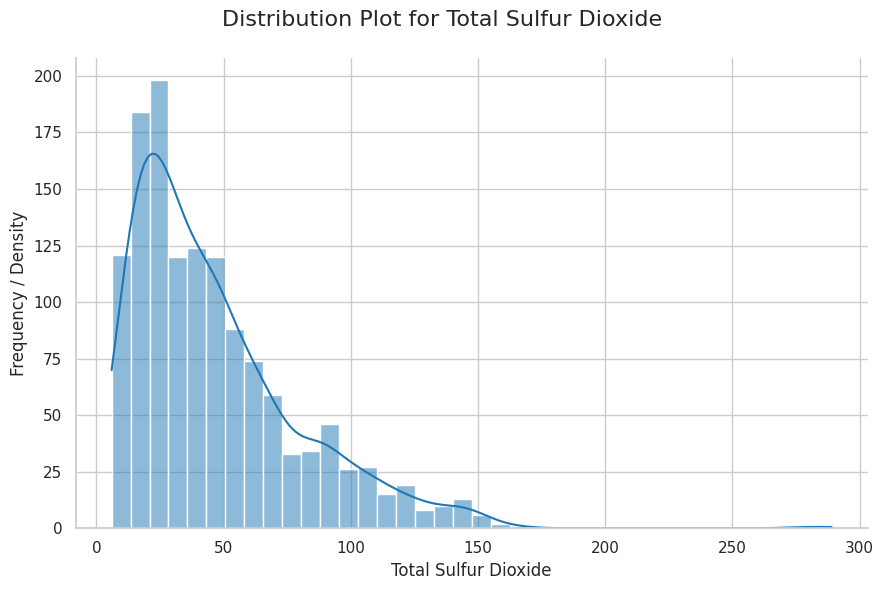

In [ ]:
g = sns.displot(df['total sulfur dioxide'], kde=True, color='#1f77b4', height=6, aspect=1.5)


g.set_axis_labels('Total Sulfur Dioxide', 'Frequency / Density')
g.fig.suptitle('Distribution Plot for Total Sulfur Dioxide', fontsize=16)

plt.subplots_adjust(top=0.9)

plt.show()

<Axes: xlabel='total sulfur dioxide'>

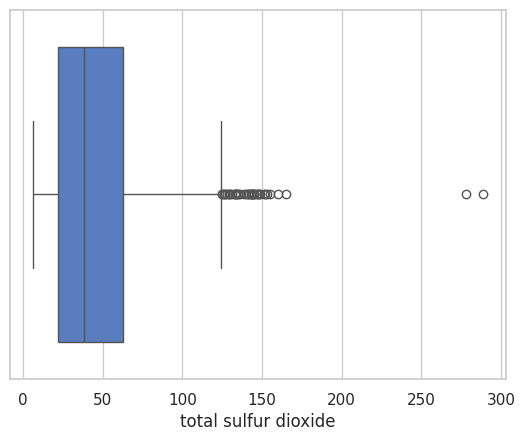

In [ ]:
sns.boxplot(data=df, x='total sulfur dioxide')

In [ ]:
find_outliers_using_interquartile_range(df, 'total sulfur dioxide')

(44, 12)

In [ ]:
df = remove_outliers_using_caping(df, 'total sulfur dioxide')

124.5 -39.5


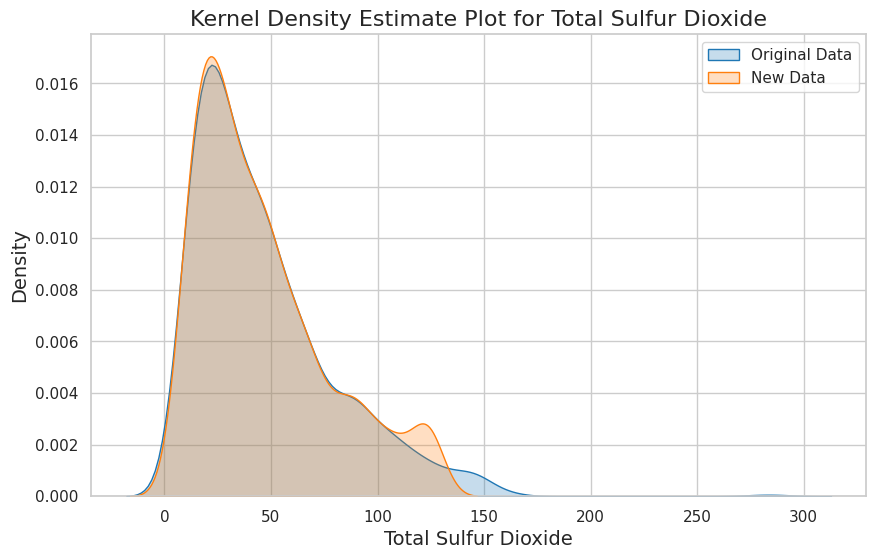

In [ ]:
color1 = '#1f77b4'
color2 = '#ff7f0e'

plt.figure(figsize=(10, 6))


sns.kdeplot(df['total sulfur dioxide'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['total sulfur dioxide new'], color=color2, fill=True, label='New Data')

plt.title('Kernel Density Estimate Plot for Total Sulfur Dioxide', fontsize=16)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend()

plt.show()

In [ ]:
df['total sulfur dioxide'] = df['total sulfur dioxide new']
df.drop('total sulfur dioxide new', axis=1, inplace=True)

In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3              11.2              0.28         0.56             1.9   0.075000   
1490            7.1              0.22         0.49             1.8   0.087706   
966             9.0              0.38         0.41             2.4   0.103000   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3                    17.0                  60.0  0.99800  3.16       0.58   
1490                  8.0                  18.0  0.99344  3.39       0.56   
966                   6.0                  10.0  0.99604  3.13       0.58   

      alcohol  quality  
3         9.8        6  
1490     12.4        6  
966      11.9        7

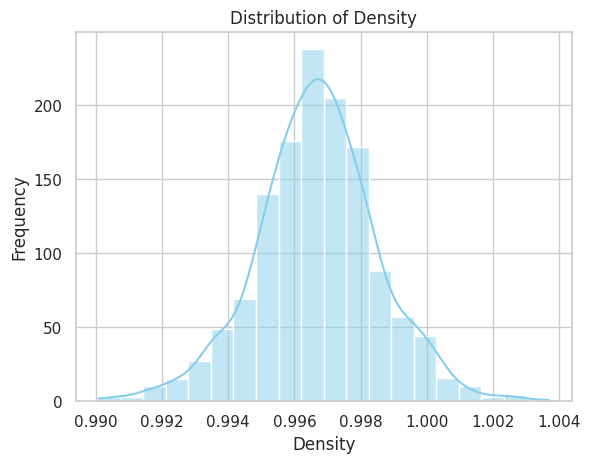

In [ ]:
sns.histplot(df['density'], kde=True, color='skyblue', bins=20)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Distribution of Density')
plt.show()

<Axes: xlabel='density'>

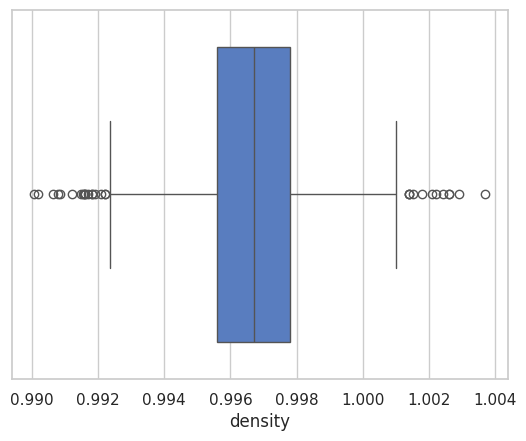

In [ ]:
sns.boxplot(data=df, x='density')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'density')

(11, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'density')

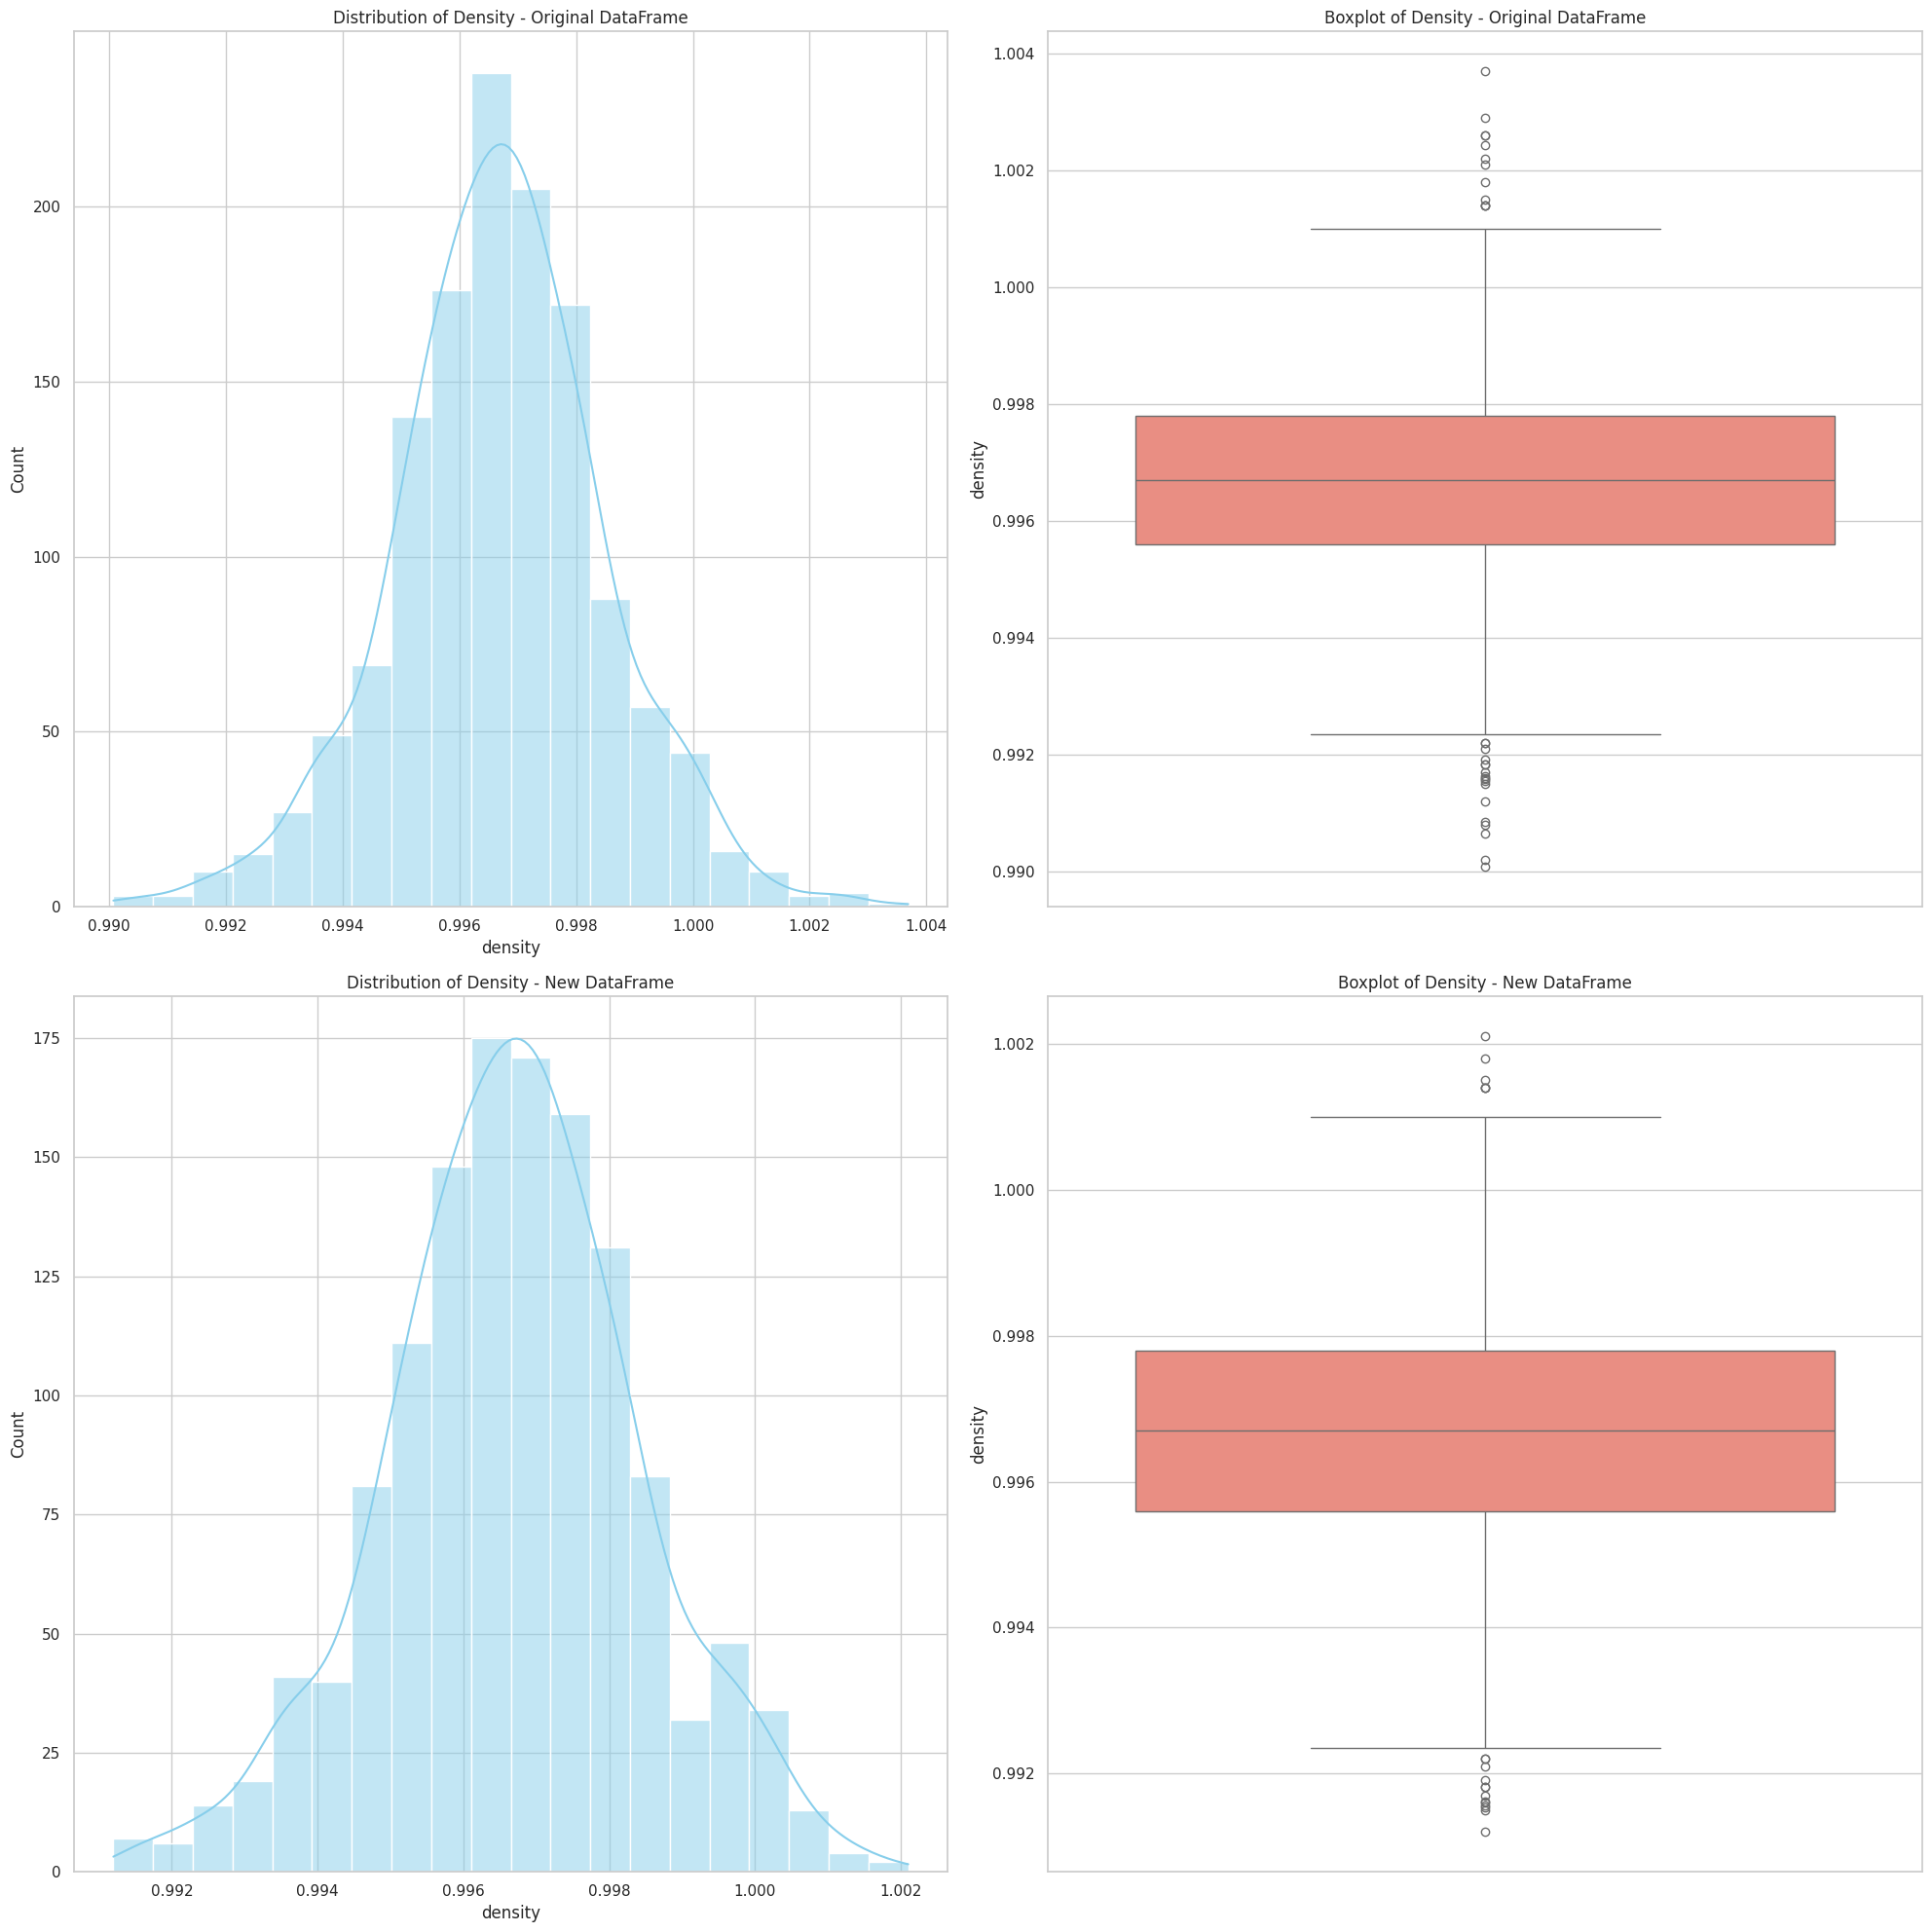

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['density'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Density - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['density'], color='salmon')
plt.title('Boxplot of Density - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['density'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Density - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['density'], color='salmon')
plt.title('Boxplot of Density - New DataFrame')

plt.tight_layout()
plt.show()

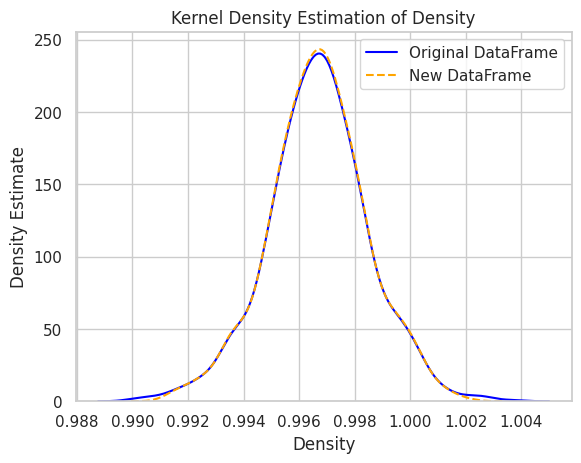

In [ ]:
sns.kdeplot(df['density'], color='blue', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['density'], color='orange', label='New DataFrame', linestyle='--')

plt.xlabel('Density')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Density')
plt.legend()

plt.show()

In [ ]:
df = new_df

In [ ]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1054            8.2              0.64         0.27             2.0      0.095   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1054                  5.0                  77.0  0.99747  3.13       0.62   

      alcohol  quality  
1054      9.1        6

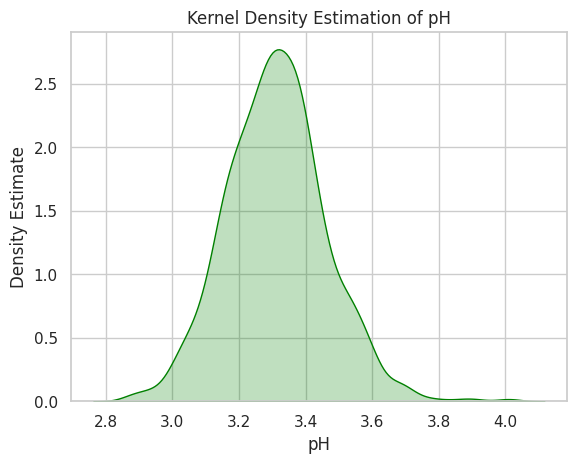

In [ ]:
sns.kdeplot(df['pH'], color='green', fill=True)

plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')

plt.show()

<Axes: xlabel='pH'>

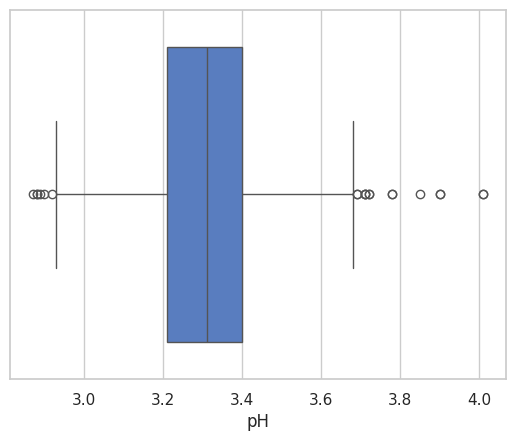

In [ ]:
sns.boxplot(data=df, x='pH')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'pH')

(7, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'pH')

<function matplotlib.pyplot.show(close=None, block=None)>

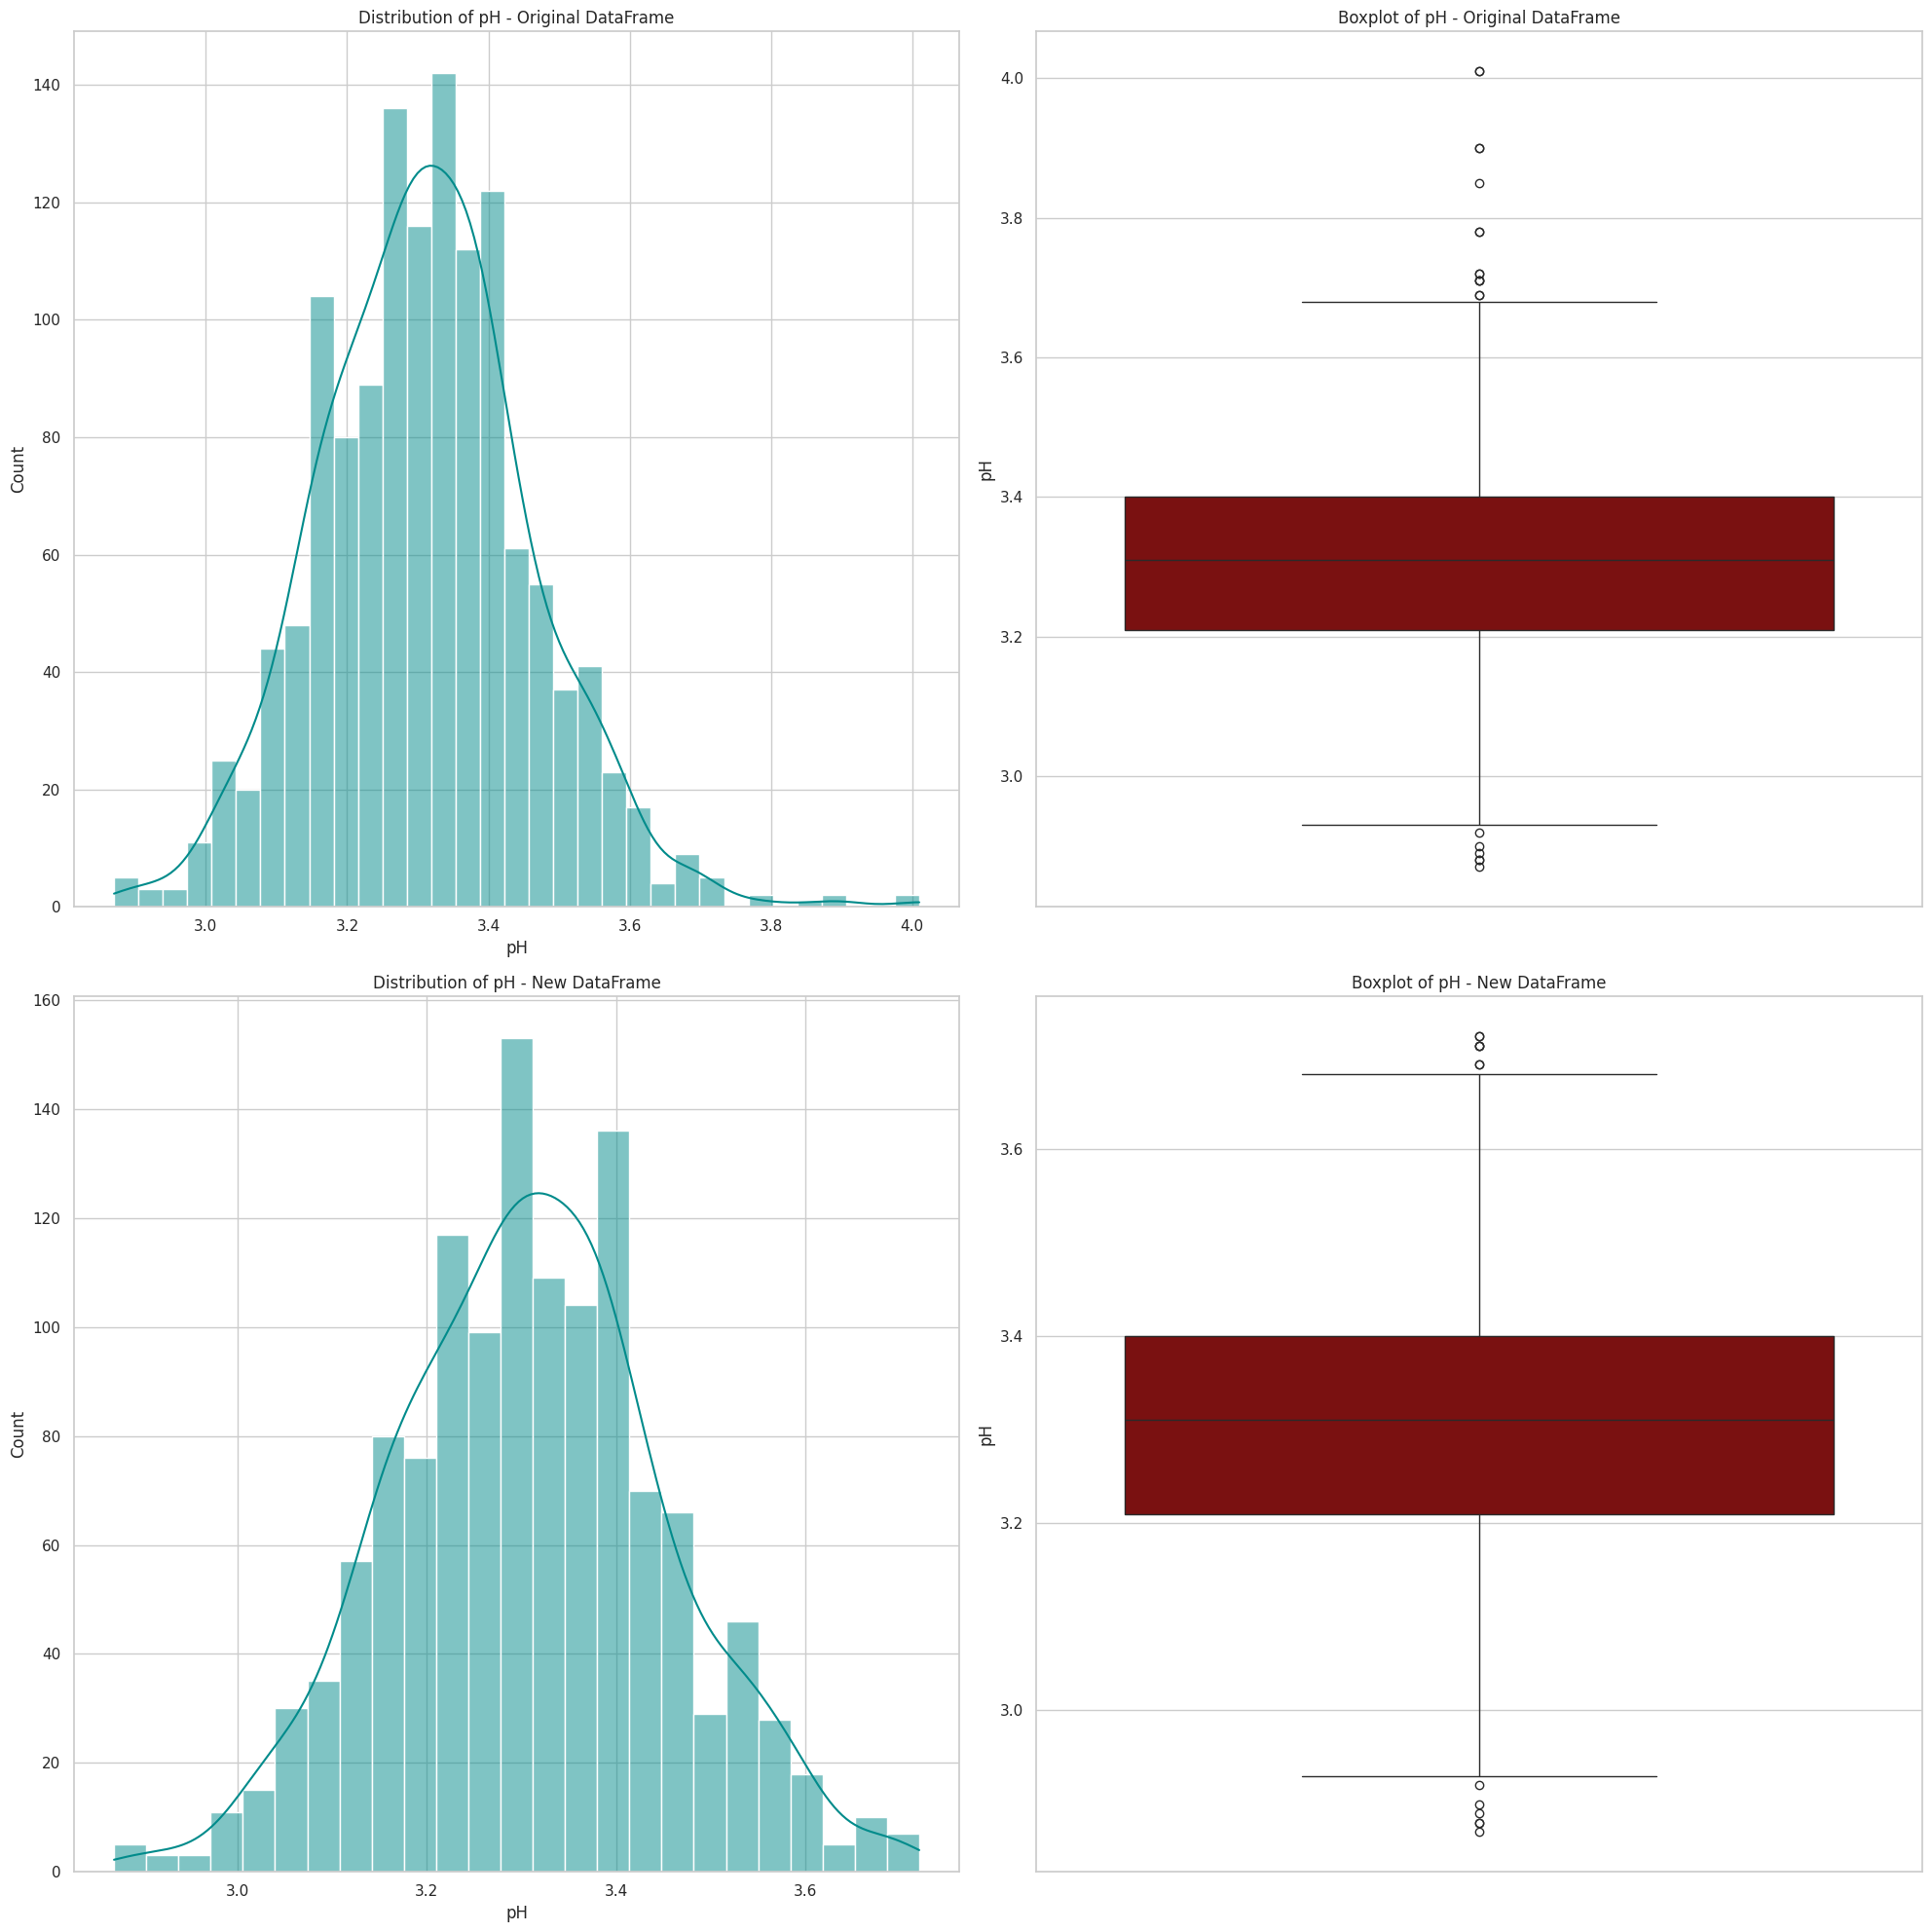

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['pH'], color='darkred')
plt.title('Boxplot of pH - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['pH'], color='darkred')
plt.title('Boxplot of pH - New DataFrame')

plt.tight_layout()
plt.show

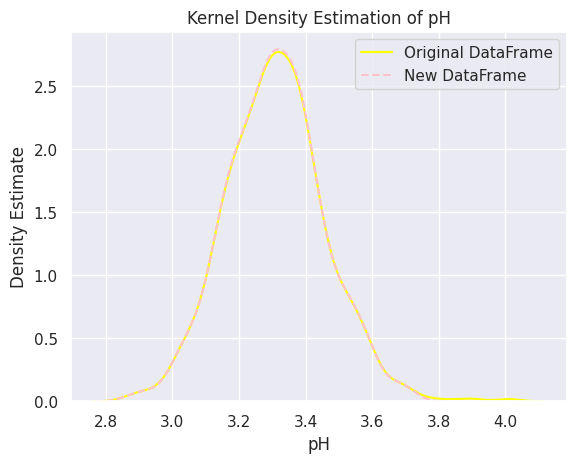

In [ ]:
sns.set_style("darkgrid")

sns.kdeplot(df['pH'], color='yellow', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['pH'], color='pink', label='New DataFrame', linestyle='--')

plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')
plt.legend()

plt.show()

In [ ]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
231            8.0              0.38         0.06             1.8      0.078   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
231                 12.0                  49.0  0.99625  3.37       0.52   

     alcohol  quality  
231      9.9        6

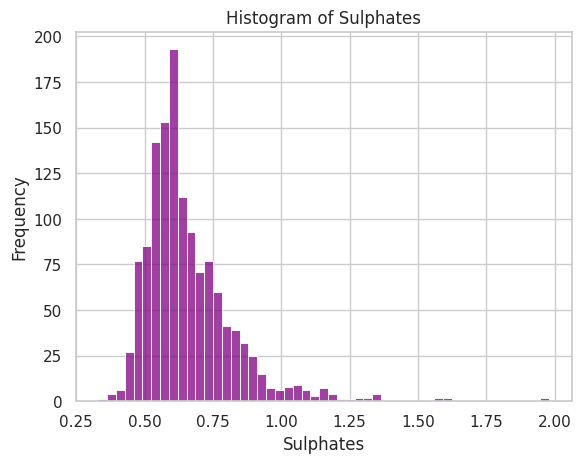

In [ ]:
sns.set_style("whitegrid")
sns.histplot(df['sulphates'], color='purple', kde=False)
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.title('Histogram of Sulphates')
plt.show()

<Axes: xlabel='sulphates'>

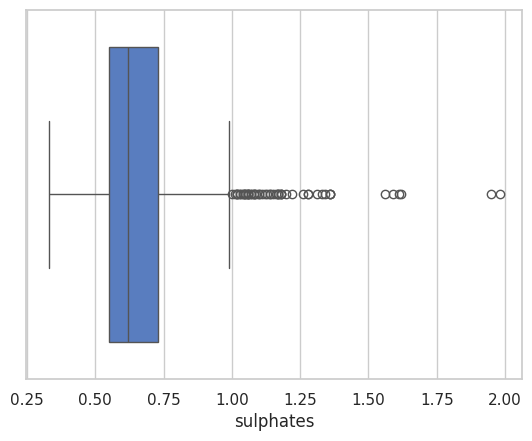

In [ ]:
sns.boxplot(data=df, x='sulphates')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'sulphates')

(23, 12)

In [ ]:
find_outliers_using_interquartile_range(df, 'sulphates')

(54, 12)

In [ ]:
df['sulphates'].skew()

2.2459730570986696

In [ ]:
df = remove_outliers_using_caping(df, 'sulphates')

0.9999999999999999 0.28000000000000014


<ipython-input-53-04af825a036c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+' new'] = np.where(df[feature] > upper_bound, upper_bound,


In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1193            6.4             0.885         0.00             2.3   0.087706   
472            12.5             0.370         0.55             2.6   0.083000   
1395            8.6             0.685         0.10             1.6   0.092000   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1193                  6.0                  12.0  0.99551  3.56       0.51   
472                  25.0                  68.0  0.99950  3.15       0.82   
1395                  3.0                  12.0  0.99745  3.31       0.65   

      alcohol  quality  sulphates new  
1193    10.80        5           0.51  
472     10.40        6           0.82  
1395     9.55        6           0.65

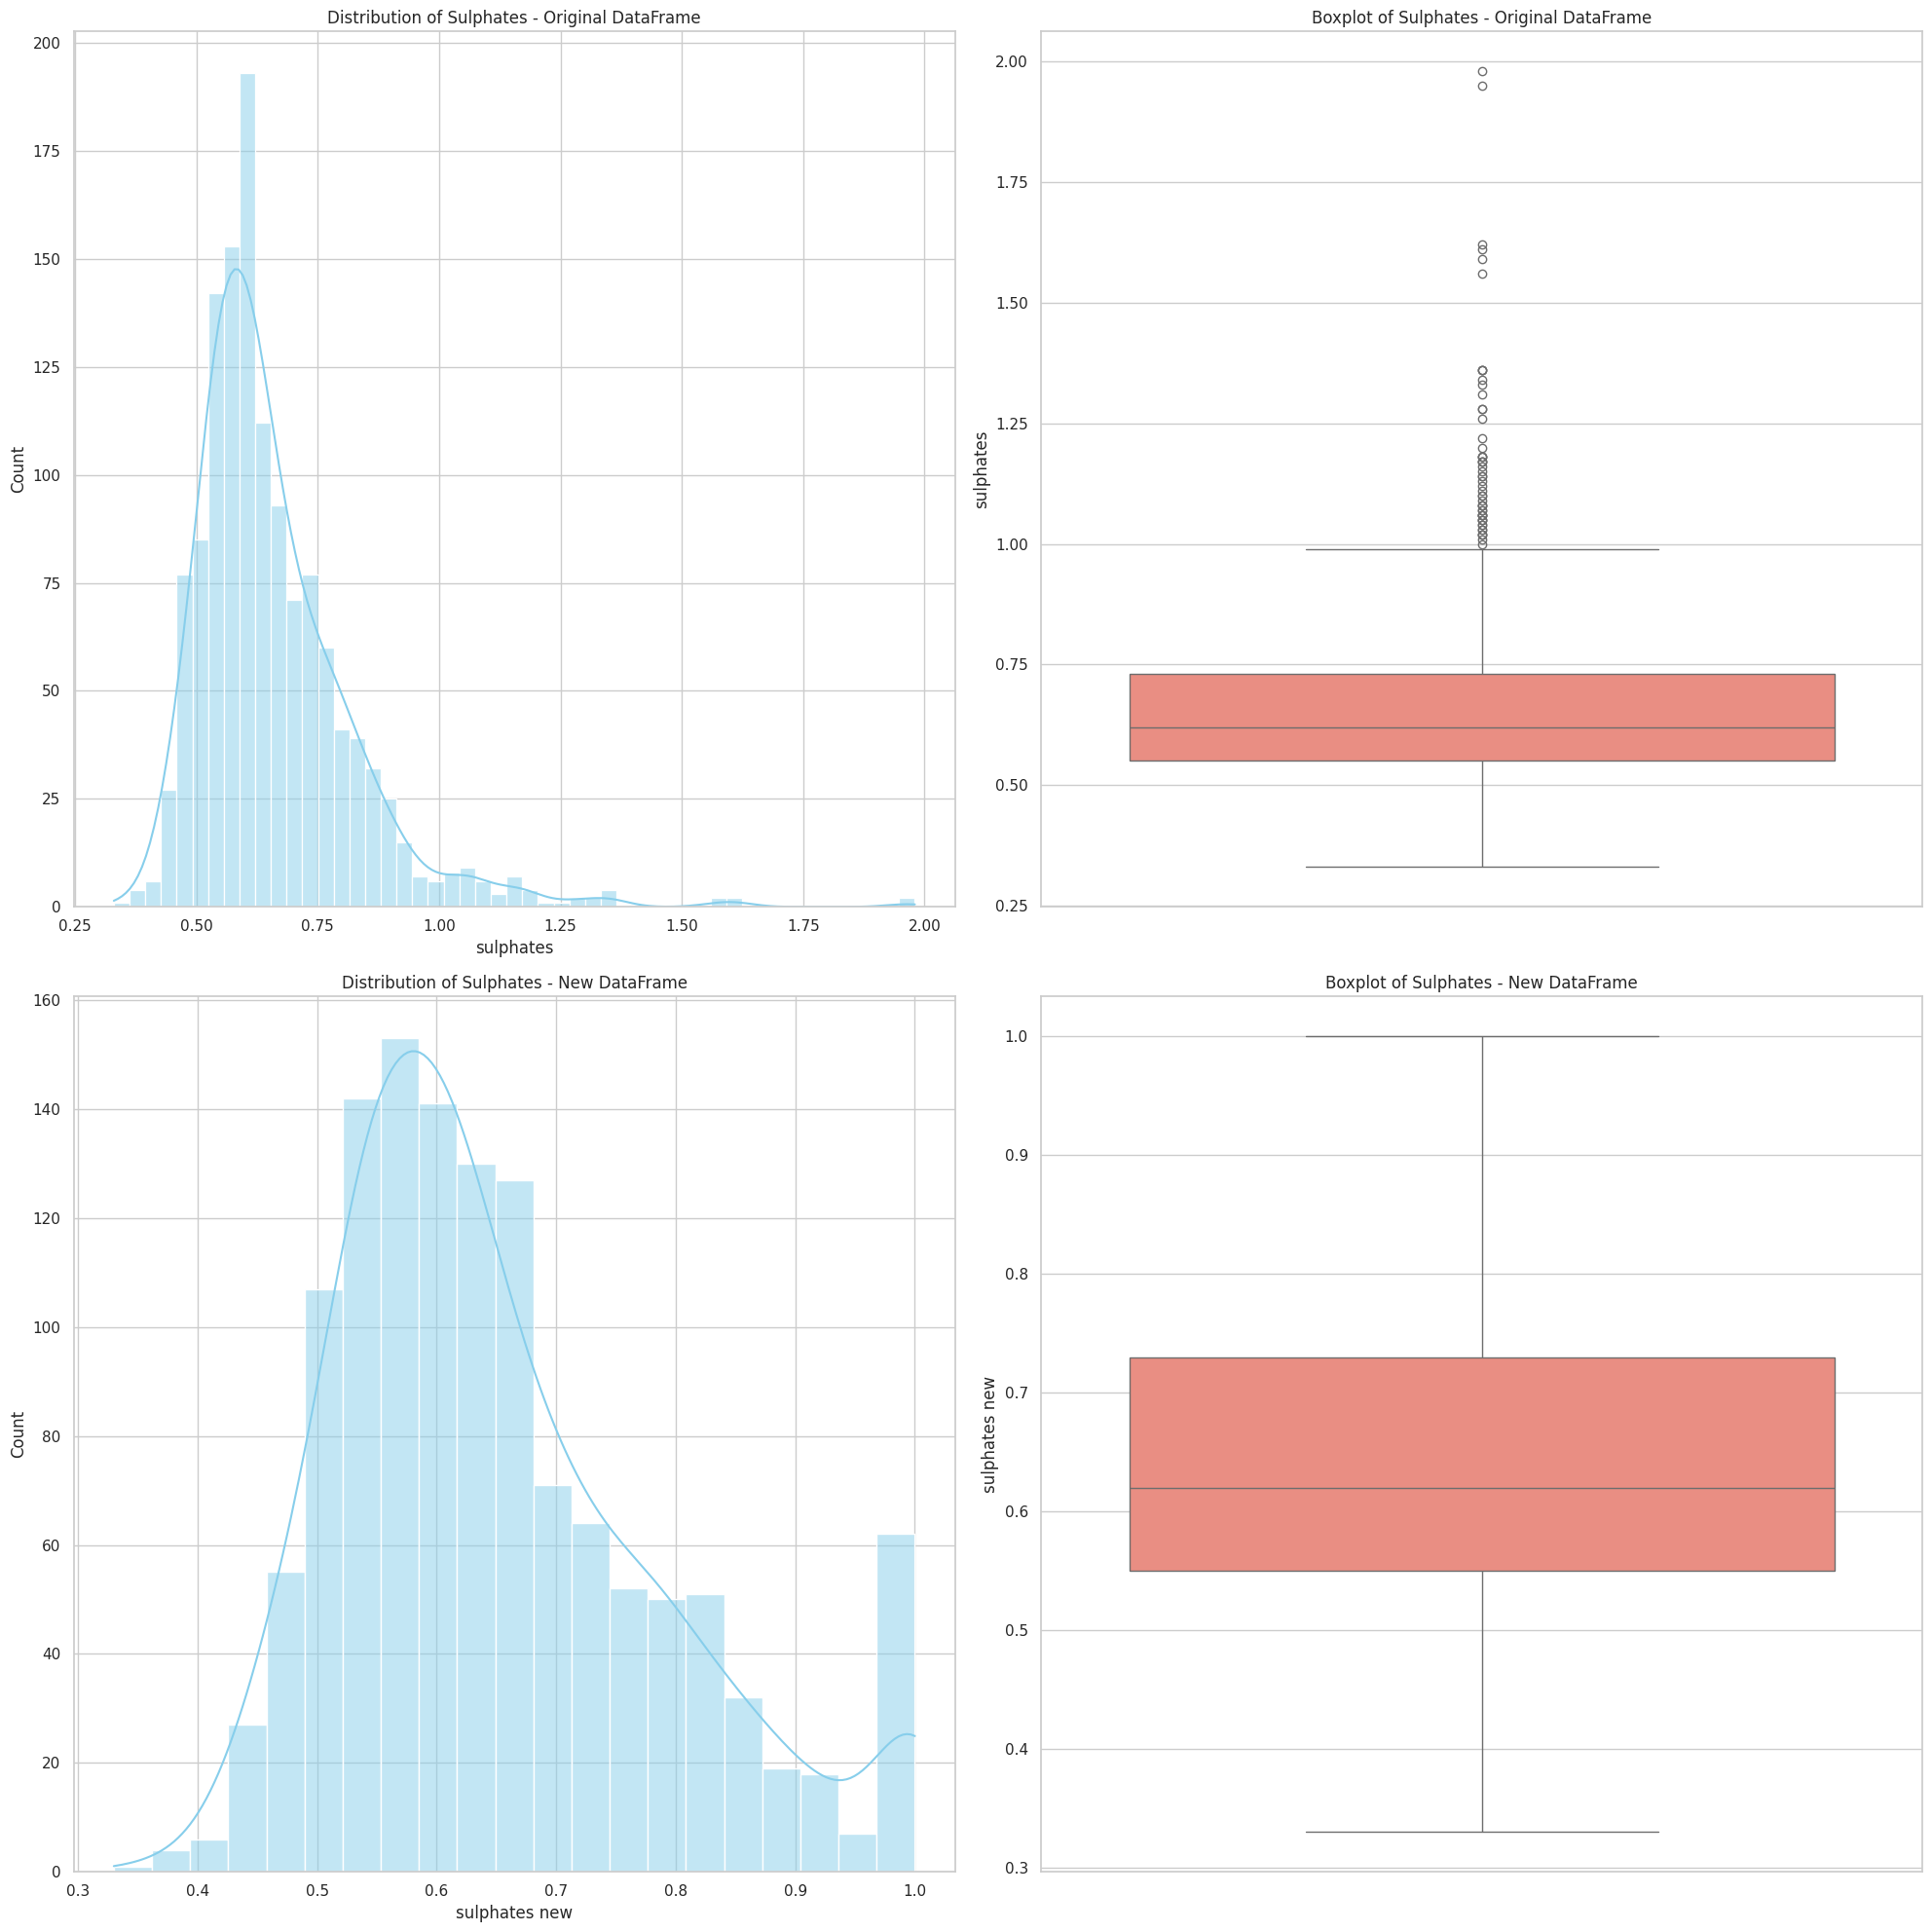

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['sulphates'], kde=True, color='skyblue')
plt.title('Distribution of Sulphates - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['sulphates'], color='salmon')
plt.title('Boxplot of Sulphates - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(df['sulphates new'], kde=True, color='skyblue')
plt.title('Distribution of Sulphates - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(df['sulphates new'], color='salmon')
plt.title('Boxplot of Sulphates - New DataFrame')

plt.tight_layout()
plt.show()

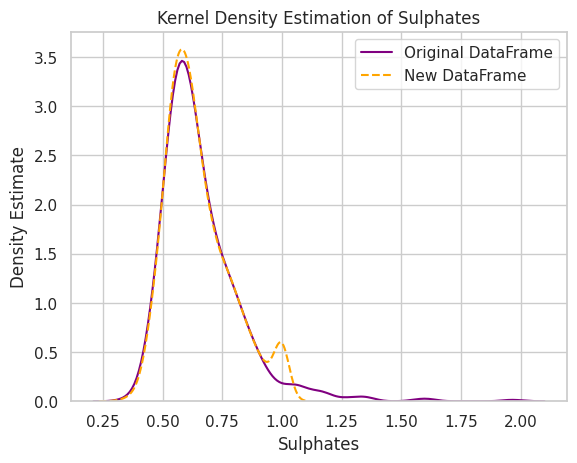

In [ ]:
sns.kdeplot(df['sulphates'], color='purple', label='Original DataFrame', linestyle='-')
sns.kdeplot(df['sulphates new'], color='orange', label='New DataFrame', linestyle='--')

plt.xlabel('Sulphates')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Sulphates')
plt.legend()

plt.show()

In [ ]:
df.loc[:, 'sulphates'] = df['sulphates new']
df.drop('sulphates new', axis=1, inplace=True)

<ipython-input-119-784920c20231>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('sulphates new', axis=1, inplace=True)


In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1246            7.4              0.74         0.07             1.7      0.086   
158             7.1              0.68         0.00             2.2      0.073   
931             7.4              0.61         0.01             2.0      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1246                 15.0                  48.0  0.99502  3.12       0.48   
158                  12.0                  22.0  0.99690  3.48       0.50   
931                  13.0                  38.0  0.99748  3.48       0.65   

      alcohol  quality  
1246     10.0        5  
158       9.3        5  
931       9.8        5

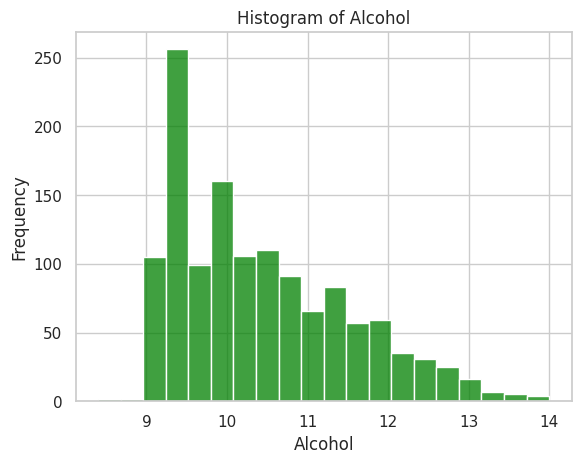

In [ ]:
sns.histplot(df['alcohol'], color='green', kde=False)


plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol')

plt.show()

<Axes: xlabel='alcohol'>

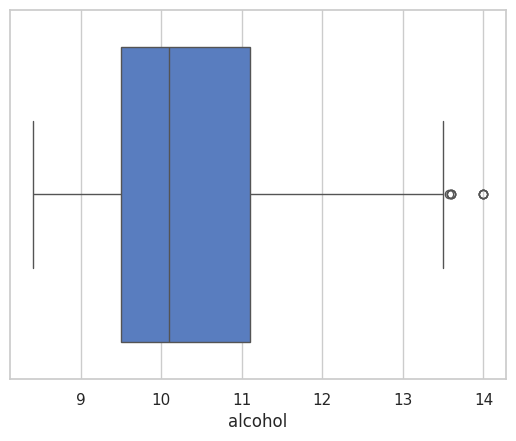

In [ ]:
sns.boxplot(data=df, x='alcohol')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'alcohol')

(4, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'alcohol')

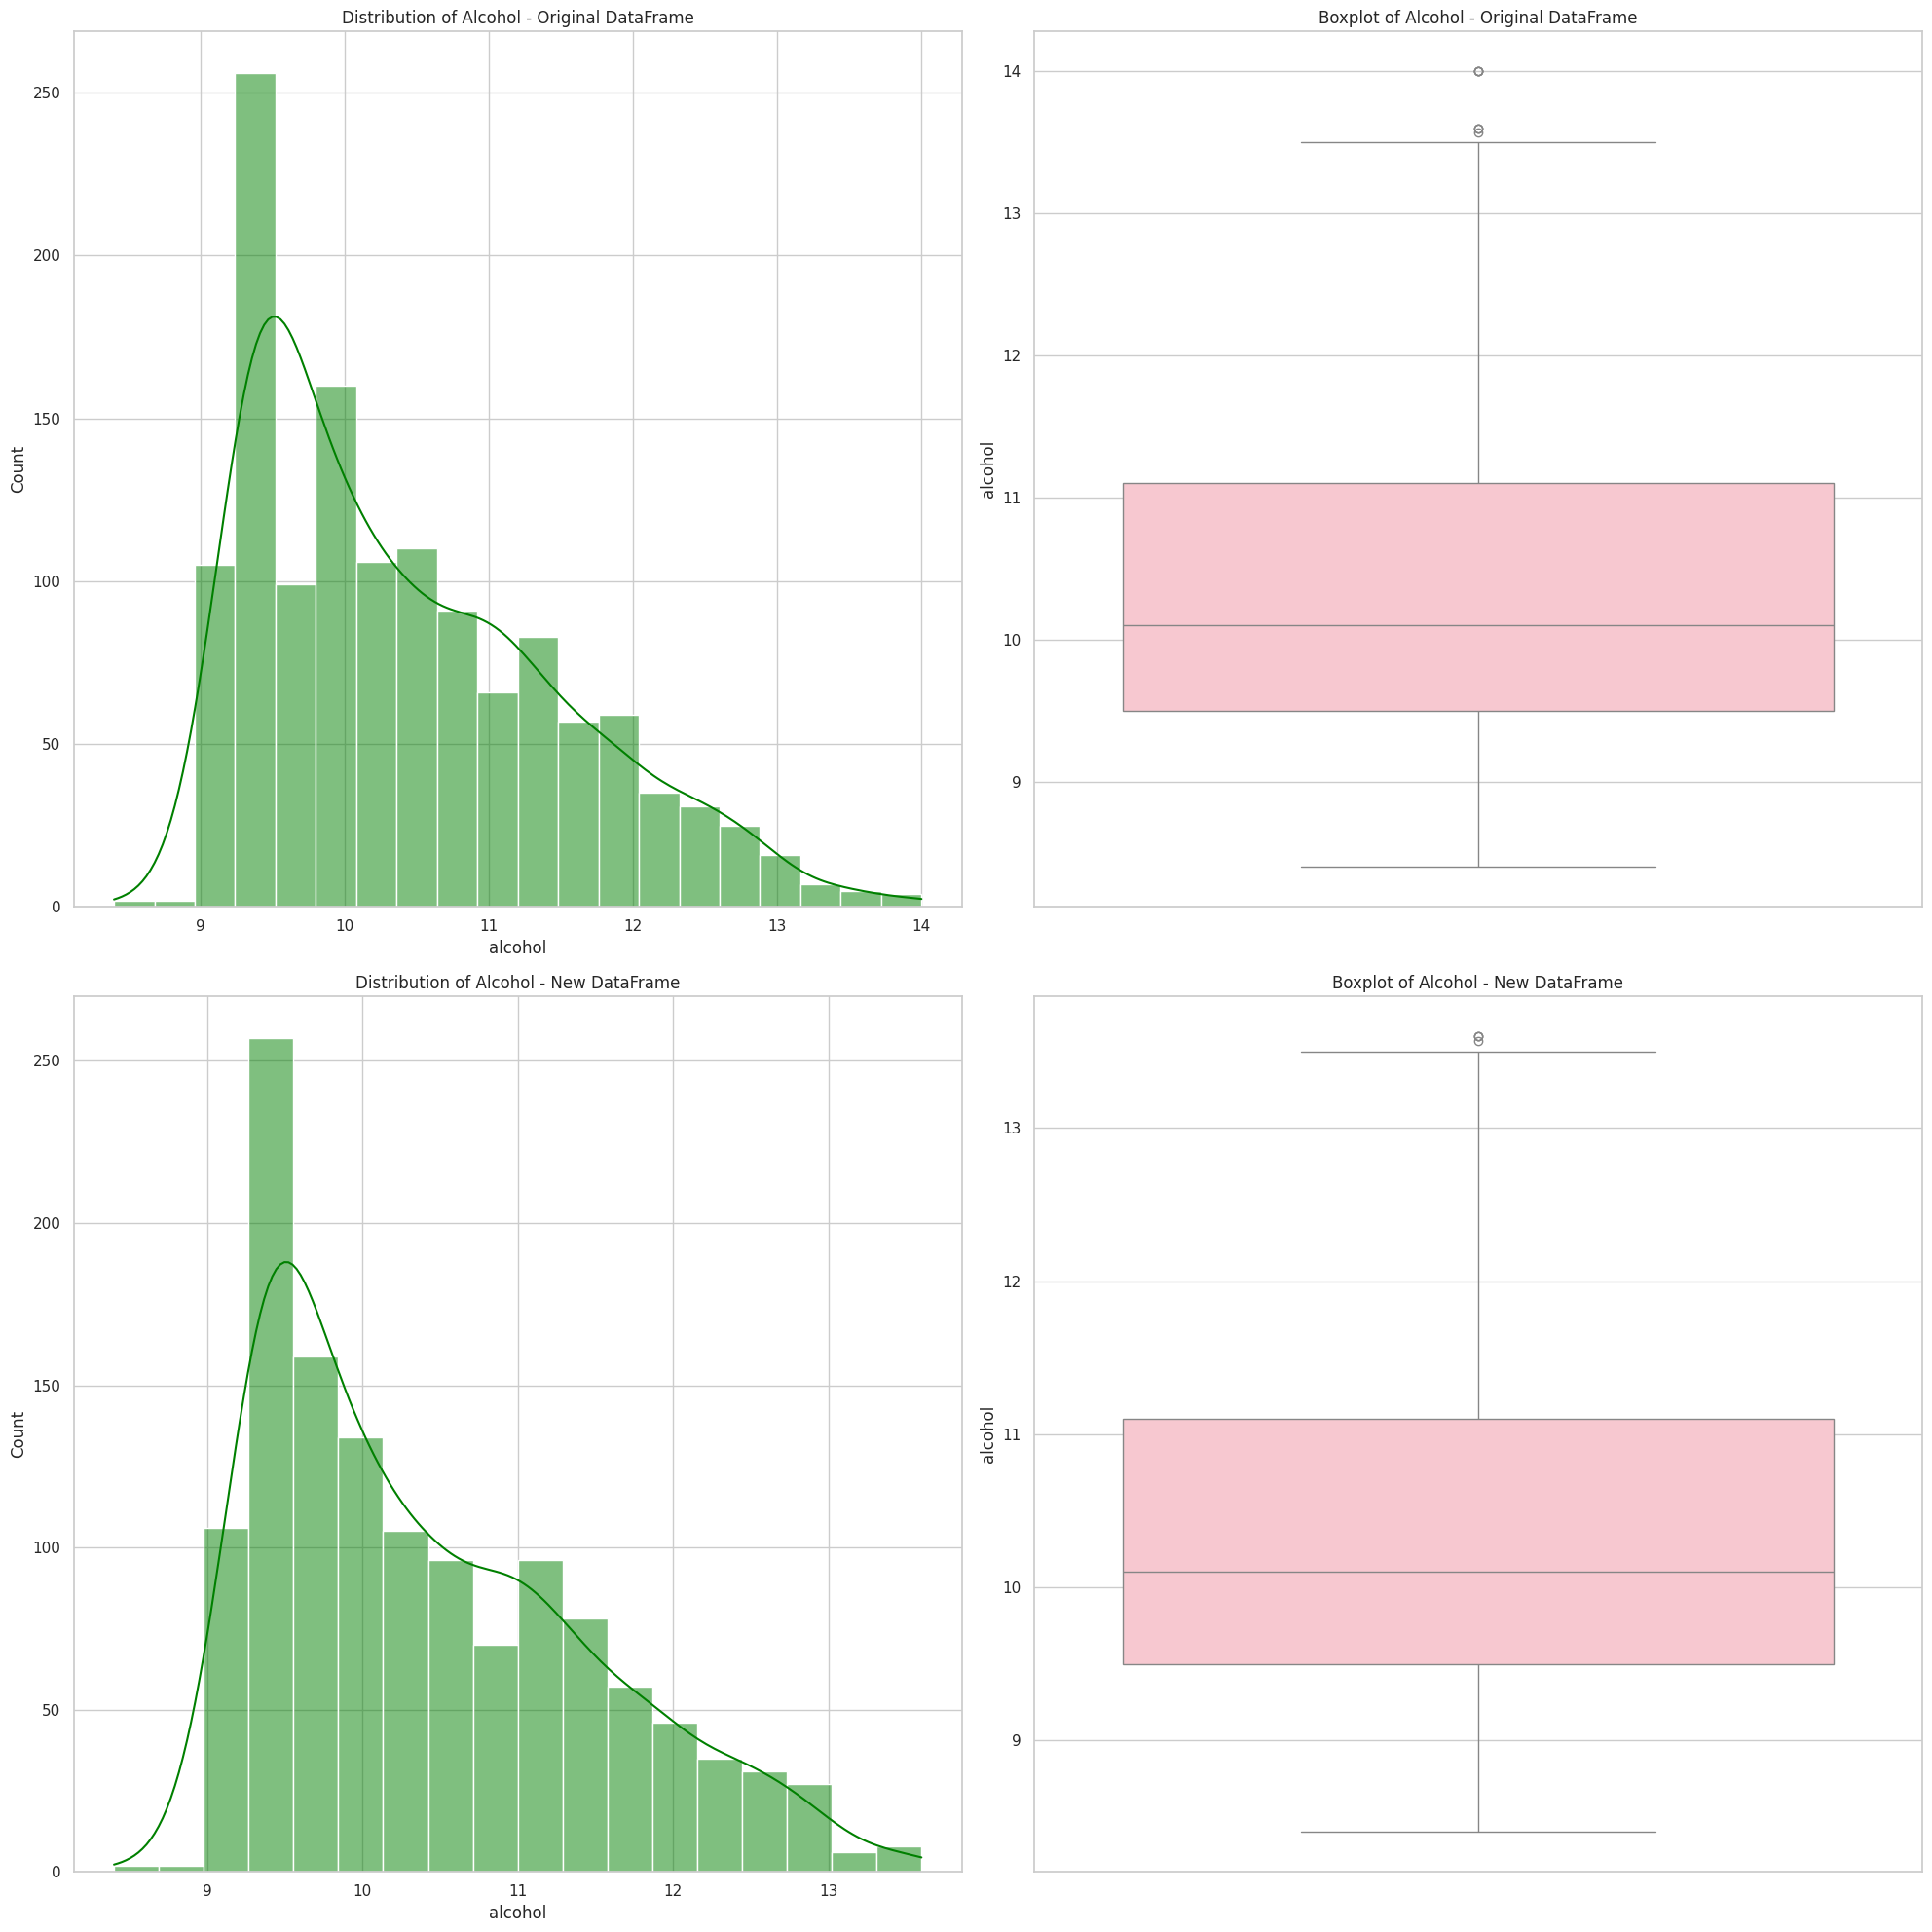

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['alcohol'], kde=True, color='green')
plt.title('Distribution of Alcohol - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['alcohol'], color='pink')
plt.title('Boxplot of Alcohol - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['alcohol'], kde=True, color='green')
plt.title('Distribution of Alcohol - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['alcohol'], color='pink')
plt.title('Boxplot of Alcohol - New DataFrame')

plt.tight_layout()
plt.show()

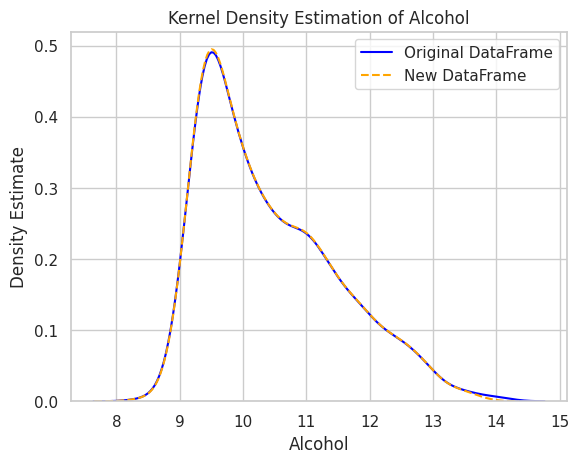

In [ ]:
sns.kdeplot(df['alcohol'], color='blue', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['alcohol'], color='orange', label='New DataFrame', linestyle='--')

plt.xlabel('Alcohol')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Alcohol')
plt.legend()

plt.show()

In [ ]:
df = new_df

In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
179             8.8              0.61         0.14             2.4      0.067   
167             7.3              0.55         0.03             1.6      0.072   
1177            7.1              0.66         0.00             2.4      0.052   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
179                  10.0                  42.0  0.99690  3.19       0.59   
167                  17.0                  42.0  0.99560  3.37       0.48   
1177                  6.0                  11.0  0.99318  3.35       0.66   

      alcohol  quality  
179       9.5        5  
167       9.0        4  
1177     12.7        7

In [ ]:
x = df.drop('quality', axis=1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
scalor = StandardScaler()
x_train = scalor.fit_transform(x_train)
x_test = scalor.transform(x_test)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 7, 6, 6, 5, 7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 8, 6, 6, 6, 5, 5, 6, 6, 7, 7,
       5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 6,
       6, 5, 5, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 5, 6])

In [ ]:
accuracy_score(y_test, y_pred)

0.623574144486692

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 0,  9,  2,  0,  0],
       [ 0, 81, 21,  0,  0],
       [ 0, 35, 71,  6,  0],
       [ 0,  1, 21, 12,  1],
       [ 0,  0,  2,  1,  0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.79      0.71       102
           6       0.61      0.63      0.62       112
           7       0.63      0.34      0.44        35
           8       0.00      0.00      0.00         3

    accuracy                           0.62       263
   macro avg       0.38      0.35      0.36       263
weighted avg       0.59      0.62      0.60       263



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
